# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy
import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Intro

In [7]:
df = pd.read_csv('../pandas_cookbook/data/movie.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
df.columns, df.index, df.values

(Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'),
 RangeIndex(start=0, stop=4916, step=1),
 array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
        ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
        ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
        ...,
        ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
        ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
        ['Color', 'Jon Gunn', 43.0, ..

In [9]:
df.columns.values

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

In [10]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [12]:
df.dtypes.value_counts()

float64    13
object     12
int64       3
dtype: int64

In [13]:
df['imdb_score'].head(), df.imdb_score.head()

(0    7.9
 1    7.1
 2    6.8
 3    8.5
 4    7.1
 Name: imdb_score, dtype: float64, 0    7.9
 1    7.1
 2    6.8
 3    8.5
 4    7.1
 Name: imdb_score, dtype: float64)

In [14]:
df[['imdb_score']].head()

,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
4,7.1


In [16]:
df.imdb_score.isna().sum(), df.imdb_score.notna().sum() 

(0, 4916)

In [17]:
df.color.value_counts(normalize=True)

Color              0.958342
Black and White    0.041658
Name: color, dtype: float64

In [18]:
df.insert(loc=df.columns.get_loc('color') + 1, column='test', value=1)

In [19]:
df.head()

,color,test,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,1,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,1,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,1,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,1,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [20]:
del df['test']

In [21]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [22]:
df.reset_index()

,index,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [23]:
df.reset_index(drop=True)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [24]:
df.set_index('color')

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
color,,,,,,,,,,,,,,,,,,,,,
Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16


In [25]:
df.rename(columns={'color': 'test'})

,test,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [26]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [27]:
df = df.set_index('movie_title')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [28]:
df['color'].head()

movie_title
Avatar                                        Color
Pirates of the Caribbean: At World's End      Color
Spectre                                       Color
The Dark Knight Rises                         Color
Star Wars: Episode VII - The Force Awakens      NaN
Name: color, dtype: object

In [29]:
df[['color']].head()

,color
movie_title,
Avatar,Color
Pirates of the Caribbean: At World's End,Color
Spectre,Color
The Dark Knight Rises,Color
Star Wars: Episode VII - The Force Awakens,NaN


In [30]:
# Use filter to select columns that has facebook
df.filter(like='facebook').head()

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes
movie_title,,,,,,
Avatar,0.0,855.0,1000.0,4834,936.0,33000
Pirates of the Caribbean: At World's End,563.0,1000.0,40000.0,48350,5000.0,0
Spectre,0.0,161.0,11000.0,11700,393.0,85000
The Dark Knight Rises,22000.0,23000.0,27000.0,106759,23000.0,164000
Star Wars: Episode VII - The Force Awakens,131.0,NaN,131.0,143,12.0,0


In [31]:
df.filter(regex='\d').head()

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
movie_title,,,,,,
Avatar,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
Pirates of the Caribbean: At World's End,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
Spectre,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
The Dark Knight Rises,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
Star Wars: Episode VII - The Force Awakens,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0


In [32]:
# number for all int and float
df.select_dtypes(include=['number']).head().T

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,Star Wars: Episode VII - The Force Awakens
num_critic_for_reviews,7.230000e+02,3.020000e+02,6.020000e+02,8.130000e+02,NaN
duration,1.780000e+02,1.690000e+02,1.480000e+02,1.640000e+02,NaN
director_facebook_likes,0.000000e+00,5.630000e+02,0.000000e+00,2.200000e+04,131.0
actor_3_facebook_likes,8.550000e+02,1.000000e+03,1.610000e+02,2.300000e+04,NaN
actor_1_facebook_likes,1.000000e+03,4.000000e+04,1.100000e+04,2.700000e+04,131.0
gross,7.605058e+08,3.094042e+08,2.000742e+08,4.481306e+08,NaN
num_voted_users,8.862040e+05,4.712200e+05,2.758680e+05,1.144337e+06,8.0
cast_total_facebook_likes,4.834000e+03,4.835000e+04,1.170000e+04,1.067590e+05,143.0
facenumber_in_poster,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0
num_user_for_reviews,3.054000e+03,1.238000e+03,9.940000e+02,2.701000e+03,NaN


In [33]:
df.select_dtypes(include='int').head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [34]:
df.min()

num_critic_for_reviews          1.00
duration                        7.00
director_facebook_likes         0.00
actor_3_facebook_likes          0.00
actor_1_facebook_likes          0.00
gross                         162.00
num_voted_users                 5.00
cast_total_facebook_likes       0.00
facenumber_in_poster            0.00
num_user_for_reviews            1.00
budget                        218.00
title_year                   1916.00
actor_2_facebook_likes          0.00
imdb_score                      1.60
aspect_ratio                    1.18
movie_facebook_likes            0.00
dtype: float64

In [35]:
# Gives non-empty count of values in each column
df.count()

color                        4897
director_name                4814
num_critic_for_reviews       4867
duration                     4901
director_facebook_likes      4814
actor_3_facebook_likes       4893
actor_2_name                 4903
actor_1_facebook_likes       4909
gross                        4054
genres                       4916
actor_1_name                 4909
num_voted_users              4916
cast_total_facebook_likes    4916
actor_3_name                 4893
facenumber_in_poster         4903
plot_keywords                4764
movie_imdb_link              4916
num_user_for_reviews         4895
language                     4904
country                      4911
content_rating               4616
budget                       4432
title_year                   4810
actor_2_facebook_likes       4903
imdb_score                   4916
aspect_ratio                 4590
movie_facebook_likes         4916
dtype: int64

In [36]:
df.isna().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Pirates of the Caribbean: At World's End,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Spectre,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
The Dark Knight Rises,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Star Wars: Episode VII - The Force Awakens,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False


In [39]:
df.isna().sum().sum()

2654

In [40]:
df.isna().any().any()

True

In [41]:
df.select_dtypes(include=['number']).sum(axis=0)

num_critic_for_reviews       6.715920e+05
duration                     5.248520e+05
director_facebook_likes      3.326544e+06
actor_3_facebook_likes       3.088835e+06
actor_1_facebook_likes       3.188144e+07
gross                        1.931509e+11
num_voted_users              4.062825e+08
cast_total_facebook_likes    4.709438e+07
facenumber_in_poster         6.753000e+03
num_user_for_reviews         1.310239e+06
budget                       1.619785e+11
title_year                   9.631773e+06
actor_2_facebook_likes       7.952291e+06
imdb_score                   3.164640e+04
aspect_ratio                 1.020058e+04
movie_facebook_likes         3.612421e+07
dtype: float64

In [43]:
college = pd.read_csv('../pandas_cookbook/data/college.csv', index_col='INSTNM')
college.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [44]:
college_ugds = college.filter(like='UGDS_')
college_ugds.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [45]:
college_ugds.isna().sum().sort_values(ascending=False)

UGDS_UNKN     661
UGDS_NRA      661
UGDS_2MOR     661
UGDS_NHPI     661
UGDS_AIAN     661
UGDS_ASIAN    661
UGDS_HISP     661
UGDS_BLACK    661
UGDS_WHITE    661
dtype: int64

In [46]:
college.isna().sum(axis=1).sort_values(ascending=False)

INSTNM
United Education Institute                   22
Excel Learning Center-San Antonio South      21
San Joaquin Valley College-Ontario           21
Marinello School of Beauty-Visalia           21
Rasmussen College-Land O' Lakes              21
                                             ..
William Jewell College                        0
William Woods University                      0
Carroll College                               0
Montana Tech of the University of Montana     0
Alabama A & M University                      0
Length: 7535, dtype: int64

In [47]:
college_ugds = college_ugds.dropna(how='all')
college_ugds.isnull().sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
UGDS_AIAN     0
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
dtype: int64

In [48]:
diversity_metric = college_ugds.ge(0.15).sum(axis=1)
diversity_metric.head()

INSTNM
Alabama A & M University               1
University of Alabama at Birmingham    2
Amridge University                     3
University of Alabama in Huntsville    1
Alabama State University               1
dtype: int64

In [49]:
diversity_metric.value_counts()

1    3042
2    2884
3     876
4      63
0       7
5       2
dtype: int64

In [50]:
df.nlargest(100, 'imdb_score').head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Towering Inferno,Color,John Blanchard,NaN,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,...,NaN,English,Canada,NaN,NaN,NaN,179.0,9.5,1.33,0
The Shawshank Redemption,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
The Godfather,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000
Dekalog,Color,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,...,37.0,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0
Kickboxer: Vengeance,NaN,John Stockwell,2.0,90.0,134.0,354.0,T.J. Storm,260000.0,NaN,Action,...,1.0,NaN,USA,NaN,17000000.0,2016.0,454.0,9.1,NaN,0


In [51]:
df.nsmallest(100, 'imdb_score').head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
Foodfight!,Color,Lawrence Kasanoff,12.0,91.0,11.0,500.0,Larry Miller,719.0,NaN,Action|Animation|Comedy|Family|Fantasy,...,66.0,English,USA,PG,65000000.0,2012.0,611.0,1.7,NaN,0
Disaster Movie,Color,Jason Friedberg,111.0,88.0,82.0,329.0,Tony Cox,869.0,14174654.0,Comedy,...,359.0,English,USA,PG-13,25000000.0,2008.0,624.0,1.9,1.85,0
Superbabies: Baby Geniuses 2,Color,Bob Clark,32.0,88.0,84.0,177.0,Vanessa Angel,650.0,9109322.0,Comedy|Family|Sci-Fi,...,129.0,English,Germany,PG,20000000.0,2004.0,384.0,1.9,2.35,0
The Helix... Loaded,Color,A. Raven Cruz,3.0,97.0,0.0,94.0,Vanilla Ice,639.0,NaN,Action|Adventure|Comedy|Fantasy|Sci-Fi,...,9.0,English,USA,R,1000000.0,2005.0,361.0,1.9,1.78,128


# Selecting Series/DF

In [52]:
college[:1]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888


In [53]:
college[:10:2]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5
Central Alabama Community College,Alexander City,AL,0.0,0.0,0.0,0,NaN,NaN,0.0,1592.0,...,0.0000,0.0000,0.0019,0.3882,1,0.5892,0.3977,0.3153,27500,16127
Auburn University at Montgomery,Montgomery,AL,0.0,0.0,0.0,0,486.0,509.0,0.0,4304.0,...,0.0297,0.0397,0.0246,0.2853,1,0.4192,0.5803,0.2930,35000,21335


In [54]:
college['CITY'].head()

INSTNM
Alabama A & M University                   Normal
University of Alabama at Birmingham    Birmingham
Amridge University                     Montgomery
University of Alabama in Huntsville    Huntsville
Alabama State University               Montgomery
Name: CITY, dtype: object

In [55]:
college.loc['Alabama A & M University', 'CITY']

'Normal'

In [56]:
college.iloc[0, college.columns.get_loc('CITY')]

'Normal'

In [58]:
college.index.get_loc('Alabama A & M University')

0

In [59]:
college.index.is_monotonic

False

In [60]:
college.sort_index(inplace=True)

In [61]:
college.index.is_monotonic, college.index.is_monotonic_increasing

(True, True)

In [62]:
college.loc['A': 'B'].head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
A & W Healthcare Educators,New Orleans,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,40.0,...,0.0000,0.0000,0.0000,0.1250,1,0.7018,0.8596,0.6667,NaN,19022.5
A T Still University of Health Sciences,Kirksville,MO,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,219800,PrivacySuppressed
ABC Beauty Academy,Garland,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,30.0,...,0.0000,0.0000,0.0000,0.0000,0,0.7857,0.0000,0.8286,NaN,PrivacySuppressed
ABC Beauty College Inc,Arkadelphia,AR,0.0,0.0,0.0,0,NaN,NaN,0.0,38.0,...,0.0000,0.0000,0.0000,0.2105,1,0.9815,1.0000,0.4688,PrivacySuppressed,16500
AI Miami International University of Art and Design,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,2778.0,...,0.0018,0.0025,0.4644,0.2185,1,0.5507,0.6966,0.3262,29900,31000


In [63]:
college.loc[:, 'CITY':'RELAFFIL'].head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL
INSTNM,,,,,,
A & W Healthcare Educators,New Orleans,LA,0.0,0.0,0.0,0
A T Still University of Health Sciences,Kirksville,MO,0.0,0.0,0.0,0
ABC Beauty Academy,Garland,TX,0.0,0.0,0.0,0
ABC Beauty College Inc,Arkadelphia,AR,0.0,0.0,0.0,0
AI Miami International University of Art and Design,Miami,FL,0.0,0.0,0.0,0


In [64]:
college.columns[college.columns.slice_indexer('CITY','RELAFFIL')]

Index(['CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL'], dtype='object')

In [65]:
college.CITY[0]

'New Orleans'

# Boolean Selection

In [66]:
df = pd.read_csv('../pandas_cookbook/data/movie.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [67]:
df.duration.isna().sum()

15

In [68]:
df.duration.dropna().gt(120).mean()

0.21199755152009794

In [69]:
df.content_rating.unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [70]:
df[df.content_rating.isin(['PG-13', 'PG', 'G', 'R'])].content_rating.unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

In [71]:
slb = pd.read_csv('../pandas_cookbook/data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [72]:
slb.index.is_monotonic

True

In [73]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [74]:
slb_summary[-2]

93.24800000000002

In [75]:
slb_summary.loc['90%']

93.24800000000002

In [76]:
lower_10 = slb_summary.loc['10%']
upper_10 = slb_summary.loc['90%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom = slb_close[criteria]

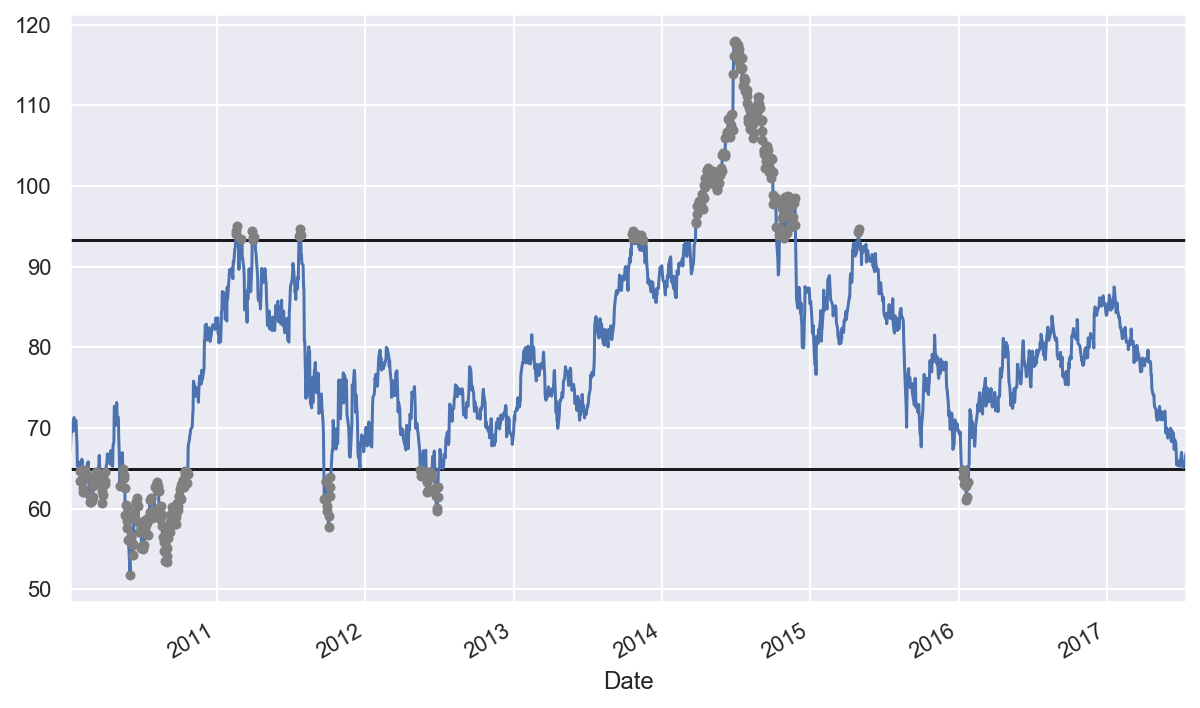

In [77]:
plt.figure(figsize=(10, 6))
slb_close.plot()
slb_top_bottom.plot(marker='o', style=' ', ms=4, color='gray')
plt.hlines([lower_10, upper_10], xmin=criteria.index[0],
           xmax=criteria.index[-1])

In [78]:
employee = pd.read_csv('../pandas_cookbook/data/employee.csv')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [79]:
top_5_dept = employee.DEPARTMENT.value_counts().index[:5]
top_5_dept

Index(['Houston Police Department-HPD', 'Houston Fire Department (HFD)',
       'Public Works & Engineering-PWE', 'Health & Human Services',
       'Houston Airport System (HAS)'],
      dtype='object')

In [80]:
employee[~employee.DEPARTMENT.isin(top_5_dept)].DEPARTMENT.unique()

array(['Municipal Courts Department', 'Library',
       'General Services Department', 'Finance',
       'Fleet Management Department', 'Solid Waste Management',
       'City Council', 'Human Resources Dept.',
       'Houston Emergency Center (HEC)', 'Parks & Recreation',
       "City Controller's Office", 'Legal Department',
       'Houston Information Tech Svcs', 'Housing and Community Devp.',
       'Dept of Neighborhoods (DON)', 'Admn. & Regulatory Affairs',
       "Mayor's Office", 'Convention and Entertainment',
       'Planning & Development'], dtype=object)

In [81]:
amzn = pd.read_csv('../pandas_cookbook/data/amzn_stock.csv')
amzn.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,136.25,136.61,133.14,133.90,7600543
1,2010-01-05,133.43,135.48,131.81,134.69,8856456
2,2010-01-06,134.60,134.73,131.65,132.25,7180977
3,2010-01-07,132.01,132.32,128.80,130.00,11030124
4,2010-01-08,130.56,133.68,129.03,133.52,9833829


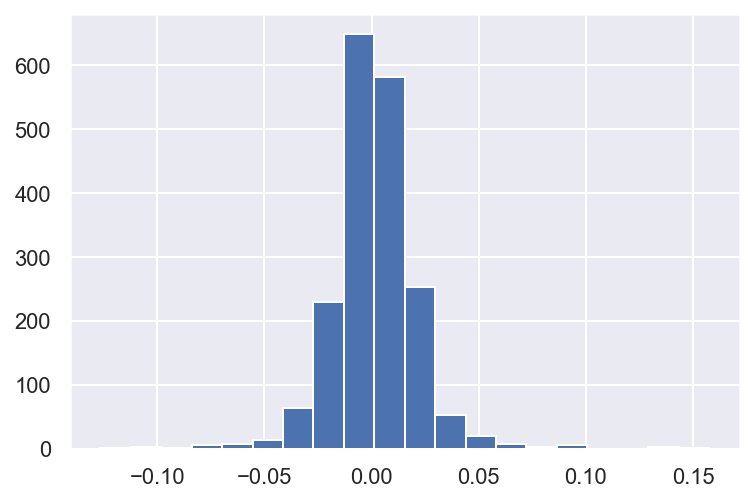

In [82]:
amzn_daily_return = amzn.Close.pct_change().dropna()
amzn_daily_return.hist(bins=20)

In [83]:
amzn.where(amzn.Close > 150, 0)

,Date,Open,High,Low,Close,Volume
0,0,0.00,0.00,0.00,0.00,0
1,0,0.00,0.00,0.00,0.00,0
2,0,0.00,0.00,0.00,0.00,0
3,0,0.00,0.00,0.00,0.00,0
4,0,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...
1891,2017-07-11,993.00,995.99,983.72,994.13,2982726
1892,2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
1893,2017-07-13,1004.62,1006.88,995.90,1000.63,2880769
1894,2017-07-14,1002.40,1004.45,996.89,1001.81,2102469


In [84]:
amzn.select_dtypes('number').idxmax()

Open      1876
High      1876
Low       1869
Close     1866
Volume     138
dtype: int64

# GroupBy

In [87]:
flights = pd.read_csv('../pandas_cookbook/data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [88]:
flights.groupby(['AIRLINE'])['ARR_DELAY'].mean()

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

In [90]:
flights.groupby(['AIRLINE'])['ARR_DELAY'].agg('mean')

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

In [91]:
flights.groupby('AIRLINE').agg({'ARR_DELAY': 'mean'})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


In [92]:
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].sum().head()

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
Name: CANCELLED, dtype: int64

In [101]:
flights.groupby(['AIRLINE'])['CANCELLED'].agg(
    max_cancelled='max',
    min_cancelled='min',
    sum_cancelled='sum'
).sort_values('sum_cancelled', ascending=False)

,max_cancelled,min_cancelled,sum_cancelled
AIRLINE,,,
AA,1,0,154
MQ,1,0,152
EV,1,0,146
OO,1,0,142
UA,1,0,93
WN,1,0,93
DL,1,0,38
NK,1,0,25
US,1,0,21


In [102]:
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED', 'DIVERTED'].agg(['sum', 'mean']).head()

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786

In [104]:
flights.groupby(['AIRLINE']).agg(
    mean_cancelled=('CANCELLED', np.mean),
    sum_cancelled=('CANCELLED', np.sum),
    mean_diverted=('DIVERTED', 'mean'),
    sum_diverted=('DIVERTED', np.sum)
)

,mean_cancelled,sum_cancelled,mean_diverted,sum_diverted
AIRLINE,,,,
AA,0.017303,154,0.002921,26
AS,0.000000,0,0.000000,0
B6,0.001842,1,0.003683,2
DL,0.003585,38,0.002264,24
EV,0.024923,146,0.002561,15
F9,0.007593,10,0.001519,2
HA,0.000000,0,0.008929,1
MQ,0.043791,152,0.001441,5
NK,0.016491,25,0.003298,5


In [105]:
flights.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

In [106]:
flights.groupby(['ORG_AIR', 'DEST_AIR']).agg({'CANCELLED': ['count', 'sum', 'mean'],
                                              'AIR_TIME': [np.mean, 'var']}).head()

CANCELLED             AIR_TIME           
                     count sum mean        mean        var
ORG_AIR DEST_AIR                                          
ATL     ABE             31   0  0.0   96.387097  45.778495
        ABQ             16   0  0.0  170.500000  87.866667
        ABY             19   0  0.0   28.578947   6.590643
        ACY              6   0  0.0   91.333333  11.466667
        AEX             40   0  0.0   78.725000  47.332692

In [107]:
airline_info = flights.groupby(['AIRLINE', 'WEEKDAY']).agg({'DIST': ['sum', 'mean'],
                                                            'ARR_DELAY': ['min', 'max']})
airline_info.head()

DIST              ARR_DELAY       
                     sum         mean       min    max
AIRLINE WEEKDAY                                       
AA      1        1455386  1139.691464     -60.0  551.0
        2        1358256  1107.876020     -52.0  725.0
        3        1496665  1117.748320     -45.0  473.0
        4        1452394  1089.567892     -46.0  349.0
        5        1427749  1122.444182     -41.0  732.0

In [108]:
airline_info.index

MultiIndex([('AA', 1),
            ('AA', 2),
            ('AA', 3),
            ('AA', 4),
            ('AA', 5),
            ('AA', 6),
            ('AA', 7),
            ('AS', 1),
            ('AS', 2),
            ('AS', 3),
            ('AS', 4),
            ('AS', 5),
            ('AS', 6),
            ('AS', 7),
            ('B6', 1),
            ('B6', 2),
            ('B6', 3),
            ('B6', 4),
            ('B6', 5),
            ('B6', 6),
            ('B6', 7),
            ('DL', 1),
            ('DL', 2),
            ('DL', 3),
            ('DL', 4),
            ('DL', 5),
            ('DL', 6),
            ('DL', 7),
            ('EV', 1),
            ('EV', 2),
            ('EV', 3),
            ('EV', 4),
            ('EV', 5),
            ('EV', 6),
            ('EV', 7),
            ('F9', 1),
            ('F9', 2),
            ('F9', 3),
            ('F9', 4),
            ('F9', 5),
            ('F9', 6),
            ('F9', 7),
            ('HA', 1),
           

In [109]:
airline_info.columns.get_level_values(0)

Index(['DIST', 'DIST', 'ARR_DELAY', 'ARR_DELAY'], dtype='object')

In [110]:
airline_info.columns.get_level_values(1)

Index(['sum', 'mean', 'min', 'max'], dtype='object')

In [111]:
# Assign new columns
airline_info.columns = airline_info.columns.get_level_values(0) + '_' + airline_info.columns.get_level_values(1)
airline_info.head()

DIST_sum    DIST_mean  ARR_DELAY_min  ARR_DELAY_max
AIRLINE WEEKDAY                                                     
AA      1         1455386  1139.691464          -60.0          551.0
        2         1358256  1107.876020          -52.0          725.0
        3         1496665  1117.748320          -45.0          473.0
        4         1452394  1089.567892          -46.0          349.0
        5         1427749  1122.444182          -41.0          732.0

In [112]:
airline_info = airline_info.reset_index()
airline_info.head()

,AIRLINE,WEEKDAY,DIST_sum,DIST_mean,ARR_DELAY_min,ARR_DELAY_max
0,AA,1,1455386,1139.691464,-60.0,551.0
1,AA,2,1358256,1107.876020,-52.0,725.0
2,AA,3,1496665,1117.748320,-45.0,473.0
3,AA,4,1452394,1089.567892,-46.0,349.0
4,AA,5,1427749,1122.444182,-41.0,732.0


In [113]:
# Use cutome aggregating fn
def max_deviation(s):
    std_score = (s - s.mean()) / s.std()
    return std_score.abs().max()

In [115]:
college = pd.read_csv('../pandas_cookbook/data/college.csv')
college.groupby('STABBR')['UGDS'].agg(max_deviation).head()

STABBR
AK    2.559847
AL    5.809757
AR    6.287710
AS         NaN
AZ    9.898690
Name: UGDS, dtype: float64

In [116]:
def pct_between(s, low, high):
    return s.between(low, high).mean()
# Using *args
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between, 1000, 10000).head()

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
Name: UGDS, dtype: float64

In [117]:
# Using **kwargs
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between, low=1000, high=10000).head()

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
Name: UGDS, dtype: float64

So the `agg` function distributes aggs and kwargs to the aggregate function.

In [118]:
def make_agg_func(func, name, *args, **kwargs):
    def wrapper(x):
        return func(x, *args, **kwargs)
    wrapper.__name__ = name
    return wrapper

In [119]:
agg1 = make_agg_func(pct_between, 'pct_1_3k', 1000, 3000)
agg2 = make_agg_func(pct_between, 'pct_10_30k', 10000, 30000)
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg([agg1, agg2]).head()

pct_1_3k  pct_10_30k
STABBR RELAFFIL                      
AK     0         0.142857    0.142857
       1         0.000000    0.000000
AL     0         0.236111    0.083333
       1         0.333333    0.000000
AR     0         0.279412    0.014706

The above method allows us to use aggregate functions with args/kwargs.

In [120]:
college.UGDS.head(), college.UGDS_WHITE.head()

(0     4206.0
 1    11383.0
 2      291.0
 3     5451.0
 4     4811.0
 Name: UGDS, dtype: float64, 0    0.0333
 1    0.5922
 2    0.2990
 3    0.6988
 4    0.0158
 Name: UGDS_WHITE, dtype: float64)

In [135]:
def check_minority(df, threshold=0.5):
    minority_pct = 1 - df['UGDS_WHITE']
    total_ugds = df['UGDS'].sum()
    total_minority = (minority_pct * total_ugds).sum()
    total_minority_pct = total_minority / total_ugds
    return total_minority_pct > threshold

In [133]:
minority_pct = 1 - college['UGDS_WHITE']
total_ugds = college['UGDS'].sum()
total_minority = (minority_pct * total_ugds).sum()
total_minority_pct = total_minority / total_ugds
total_minority_pct > 0.5

True

In [141]:
college.shape

(7535, 27)

In [142]:
college.groupby('STABBR').filter(check_minority, 0.5).head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


`filter` here is different than the one we used to select columns.

In [143]:
weight_loss = pd.read_csv('../pandas_cookbook/data/weight_loss.csv')
weight_loss.head()

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283


In [144]:
weight_loss.query('Month == "Jan"')

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190


In [145]:
weight_loss.Month.value_counts()

Jan    8
Apr    8
Feb    8
Mar    8
Name: Month, dtype: int64

In [146]:
def find_pct_loss(s):
    return (s - s.iloc[0]) / s.iloc[0]
find_pct_loss(weight_loss.query('Month == "Jan" and Name == "Bob"')['Weight'])

0    0.000000
2   -0.010309
4   -0.027491
6   -0.027491
Name: Weight, dtype: float64

In [147]:
pct_loss = weight_loss.groupby(['Name', 'Month'])['Weight'].transform(find_pct_loss)
pct_loss

0     0.000000
1     0.000000
2    -0.010309
3    -0.040609
4    -0.027491
5    -0.040609
6    -0.027491
7    -0.035533
8     0.000000
9     0.000000
10   -0.028269
11   -0.031579
12   -0.053004
13   -0.068421
14   -0.053004
15   -0.089474
16    0.000000
17    0.000000
18    0.011194
19    0.000000
20   -0.011194
21   -0.017341
22   -0.026119
23   -0.017341
24    0.000000
25    0.000000
26   -0.011494
27   -0.035294
28   -0.030651
29   -0.035294
30   -0.042146
31   -0.052941
Name: Weight, dtype: float64

So basically for each group, the `weight` column will be passed as a series to the function in the `transform`. Note that `transform` only accepts one function as a parameter. This will operate on the entire dataframe so we will get back a series of the same size as the dataframe/.

In [149]:
weight_loss['Weight Perc Loss'] = pct_loss.round(3)
weight_loss.query('Name == "Amy"')

,Name,Month,Week,Weight,Weight Perc Loss
1,Amy,Jan,Week 1,197,0.000
3,Amy,Jan,Week 2,189,-0.041
5,Amy,Jan,Week 3,189,-0.041
7,Amy,Jan,Week 4,190,-0.036
9,Amy,Feb,Week 1,190,0.000
11,Amy,Feb,Week 2,184,-0.032
13,Amy,Feb,Week 3,177,-0.068
15,Amy,Feb,Week 4,173,-0.089
17,Amy,Mar,Week 1,173,0.000
19,Amy,Mar,Week 2,173,0.000


In [153]:
week4 = weight_loss.query('Week == "Week 4"')
winner = week4.pivot_table(index='Month', columns='Name', values='Weight Perc Loss')
winner

Name,Amy,Bob
Month,,
Apr,-0.053,-0.042
Feb,-0.089,-0.053
Jan,-0.036,-0.027
Mar,-0.017,-0.026


In [154]:
winner['Winner'] = np.where(winner.Amy > winner.Bob, 'Bob', 'Amy')
winner

Name,Amy,Bob,Winner
Month,,,
Apr,-0.053,-0.042,Amy
Feb,-0.089,-0.053,Amy
Jan,-0.036,-0.027,Amy
Mar,-0.017,-0.026,Bob


In [155]:
winner.style.highlight_min(axis=1)

Name,Amy,Bob,Winner
Month,,,
Apr,-0.053,-0.042,Amy
Feb,-0.089,-0.053,Amy
Jan,-0.036,-0.027,Amy
Mar,-0.017,-0.026,Bob


In [156]:
college.SATMTMID.head()

0    420.0
1    565.0
2      NaN
3    590.0
4    430.0
Name: SATMTMID, dtype: float64

In [157]:
groupby = flights.groupby(['ORG_AIR', 'DEST_AIR'])
groupby.size().head()

ORG_AIR  DEST_AIR
ATL      ABE         31
         ABQ         16
         ABY         19
         ACY          6
         AEX         40
dtype: int64

In [161]:
flights.pivot_table(index='ORG_AIR', columns='DEST_AIR', aggfunc='count')

AIRLINE                                                       ...  \
DEST_AIR     ABE   ABI   ABQ   ABR   ABY   ACT   ACV  ACY   AEX   AGS  ...   
ORG_AIR                                                                ...   
ATL         31.0   NaN  16.0   NaN  19.0   NaN   NaN  6.0  40.0  83.0  ...   
DEN          NaN   NaN  46.0   NaN   NaN   NaN   NaN  NaN   NaN   NaN  ...   
DFW          NaN  74.0  54.0   NaN   NaN  49.0   NaN  NaN  39.0   NaN  ...   
IAH          NaN   NaN  26.0   NaN   NaN   NaN   NaN  NaN  30.0   NaN  ...   
LAS          NaN   NaN  35.0   NaN   NaN   NaN   NaN  NaN   NaN   NaN  ...   
LAX          NaN   NaN  55.0   NaN   NaN   NaN   NaN  NaN   NaN   NaN  ...   
MSP          NaN   NaN   9.0  19.0   NaN   NaN   NaN  NaN   NaN   NaN  ...   
ORD         24.0   NaN  20.0   NaN   NaN   NaN   NaN  3.0   NaN   NaN  ...   
PHX          NaN   NaN  70.0   NaN   NaN   NaN   NaN  NaN   NaN   NaN  ...   
SFO          NaN   NaN  12.0   NaN   NaN   NaN  40.0  NaN   NaN   NaN  ...   

         WEEKDAY                                                        
DEST_AIR     TUL   TUS   TVC   TXK   TYR   TYS   VLD   VPS   XNA   YUM  
ORG_AIR                                                                 
ATL         44.0  10.0   NaN   NaN   NaN  60.0  23.0  65.0  54.0   NaN  
DEN         42.0  67.0   NaN   NaN   NaN   9.0   NaN   NaN   9.0   NaN  
DFW         74.0  69.0   NaN  37.0  47.0  53.0   NaN  53.0  69.0   NaN  
IAH         41.0  26.0   NaN   NaN  19.0  20.0   NaN  21.0  39.0   NaN  
LAS          7.0  31.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
LAX          NaN  68.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
MSP         18.0   2.0   5.0   NaN   NaN   NaN   NaN   NaN  14.0   NaN  
ORD         54.0  17.0  49.0   NaN   NaN  63.0   NaN   NaN  86.0   NaN  
PHX         24.0  33.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  53.0  
SFO          NaN  20.0   NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN  

[10 rows x 3252 columns]

In [165]:
pd.crosstab(index=flights['ORG_AIR'], columns=flights['DEST_AIR'], normalize=True)

DEST_AIR,ABE,ABI,ABQ,ABR,ABY,ACT,ACV,ACY,AEX,AGS,...,TUL,TUS,TVC,TXK,TYR,TYS,VLD,VPS,XNA,YUM
ORG_AIR,,,,,,,,,,,,,,,,,,,,,
ATL,0.00053,0.000000,0.000274,0.000000,0.000325,0.000000,0.000000,0.000103,0.000684,0.001419,...,0.000752,0.000171,0.000000,0.000000,0.000000,0.001026,0.000393,0.001111,0.000923,0.000000
DEN,0.00000,0.000000,0.000786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000718,0.001145,0.000000,0.000000,0.000000,0.000154,0.000000,0.000000,0.000154,0.000000
DFW,0.00000,0.001265,0.000923,0.000000,0.000000,0.000838,0.000000,0.000000,0.000667,0.000000,...,0.001265,0.001180,0.000000,0.000633,0.000804,0.000906,0.000000,0.000906,0.001180,0.000000
IAH,0.00000,0.000000,0.000445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000513,0.000000,...,0.000701,0.000445,0.000000,0.000000,0.000325,0.000342,0.000000,0.000359,0.000667,0.000000
LAS,0.00000,0.000000,0.000598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000120,0.000530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAX,0.00000,0.000000,0.000940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MSP,0.00000,0.000000,0.000154,0.000325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000308,0.000034,0.000085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,0.000000
ORD,0.00041,0.000000,0.000342,0.000000,0.000000,0.000000,0.000000,0.000051,0.000000,0.000000,...,0.000923,0.000291,0.000838,0.000000,0.000000,0.001077,0.000000,0.000000,0.001470,0.000000
PHX,0.00000,0.000000,0.001197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000410,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000906


# Tidy

In [166]:
state_fruit = pd.read_csv('../pandas_cookbook/data/state_fruit2.csv')
state_fruit.head()

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [167]:
state_fruit.stack()

0  State       Texas
   Apple          12
   Orange         10
   Banana         40
1  State     Arizona
   Apple           9
   Orange          7
   Banana         12
2  State     Florida
   Apple           0
   Orange         14
   Banana        190
dtype: object

In [169]:
state_fruit.melt(id_vars=['State'], value_vars=['Apple', 'Orange', 'Banana'],
                 var_name=['Fruit'], value_name='Weight')

,State,Fruit,Weight
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


# Merge

In [170]:
stocks_2016 = pd.read_csv('../pandas_cookbook/data/stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv('../pandas_cookbook/data/stocks_2017.csv', index_col='Symbol')
stocks_2016.head()

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [171]:
# We can't identify the year
pd.concat([stocks_2016, stocks_2017]).head()

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40


In [172]:
# To identify the year
pd.concat([stocks_2016, stocks_2017], keys=['2016', '2017'],
          names=['Year', 'Symbol']).head()

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40

In [173]:
# If we concatenate using axis=1, default is outer join.
pd.concat([stocks_2016, stocks_2017], keys=['2016', '2017'],
          names=['Year', None], axis=1).head()

/Users/imad/anaconda3/envs/ds-zoo/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Year   2016                2017              
     Shares   Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0
GE      NaN   NaN    NaN  100.0   30.0   40.0
IBM     NaN   NaN    NaN   87.0   75.0   95.0
SLB     NaN   NaN    NaN   20.0   55.0   85.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0

In [174]:
# Using inner join.
pd.concat([stocks_2016, stocks_2017], keys=['2016', '2017'],
          names=['Year', None], axis=1, join='inner').head()

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

- pd.Concat combines two or more df/series both horizontally and vertically
- join combines two or more df/series horizontally.
- merge combines two df/series horizontally.
- pd.append append rows to a dataframe.

# Time Series

In [11]:
crime = pd.read_hdf('../pandas_cookbook/data/crime.h5').set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [12]:
# Get data between 1 am and 2 am
crime.between_time('1:00', '2:00').shape

(13413, 7)

In [13]:
crime.sort_index().first('5D').shape

(605, 7)

In [16]:
crime.sort_index().first('A').shape

(56897, 7)

In [18]:
crime_sorted = crime.sort_index()

In [19]:
crime_sorted.resample('W').size().head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [20]:
crime_sorted.resample('Y')['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-12-31,37286,19786
2013-12-31,50698,18862
2014-12-31,62690,21763
2015-12-31,65894,23310
2016-12-31,67381,23744
2017-12-31,51902,17836


In [21]:
crime_sorted.reset_index()['REPORTED_DATE'].dt.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [25]:
crime = crime_sorted.reset_index()
weekday = crime['REPORTED_DATE'].dt.weekday_name
year = crime['REPORTED_DATE'].dt.year
crime.groupby([year, weekday]).size()

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
               Sunday            8444
               Thursday         10431
               Tuesday          10416
               Wednesday        10354
2014           Friday           12683
               Monday           12813
               Saturday         10950
               Sunday           10278
               Thursday         12309
               Tuesday          12440
               Wednesday        12948
2015           Friday           13273
               Monday           13452
               Saturday         11586
               Sunday           10624
               Thursd

# Visualization

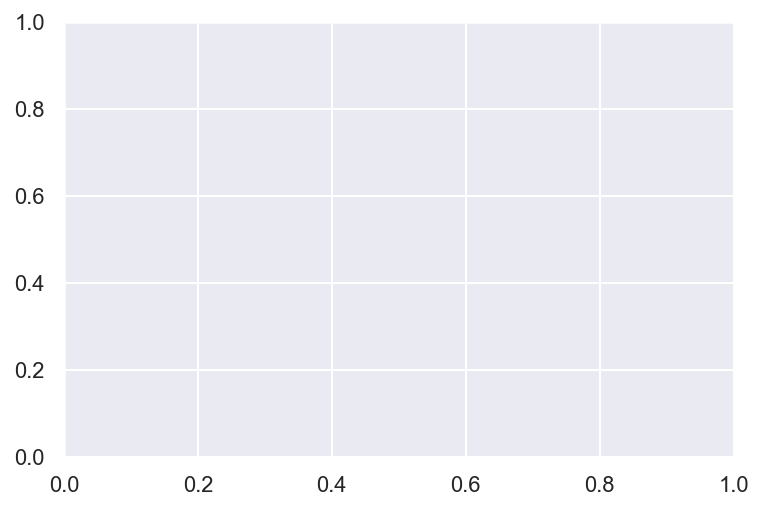

In [26]:
fig, ax = plt.subplots()

In [27]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

In [28]:
fig.get_size_inches()

array([6., 4.])

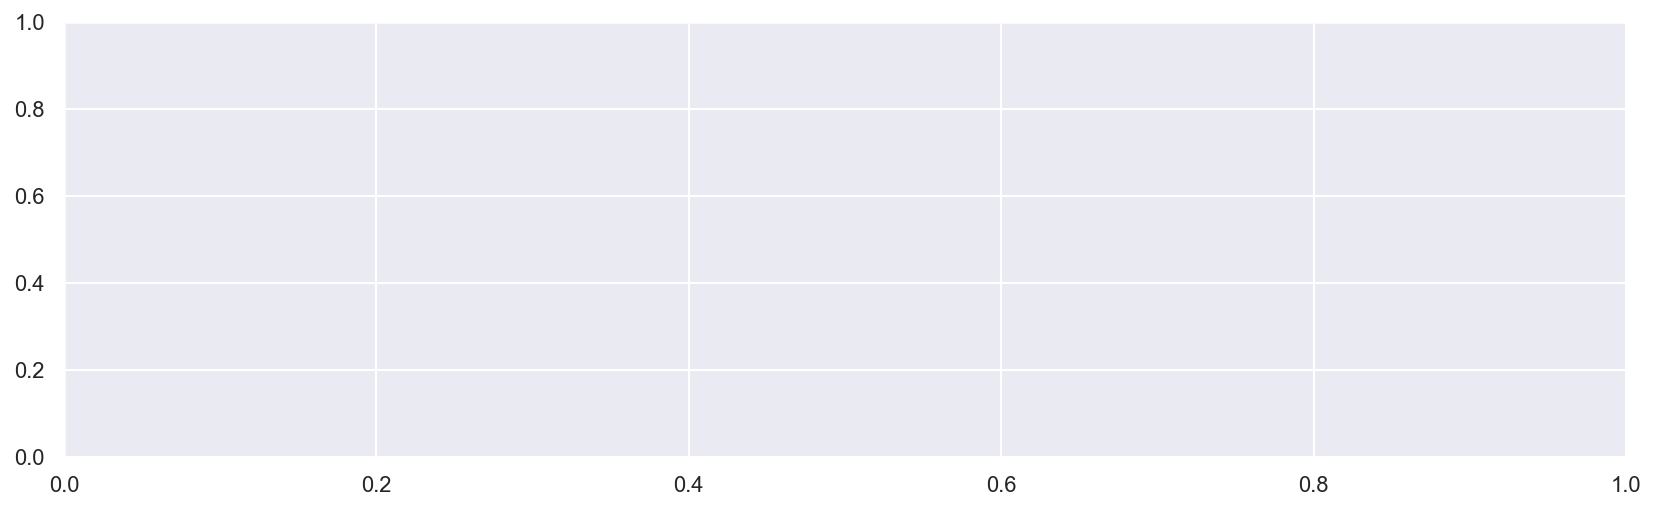

In [29]:
fig.set_size_inches(14, 4)
fig

In [30]:
fig.axes

In [31]:
fig.axes[0] is ax

True

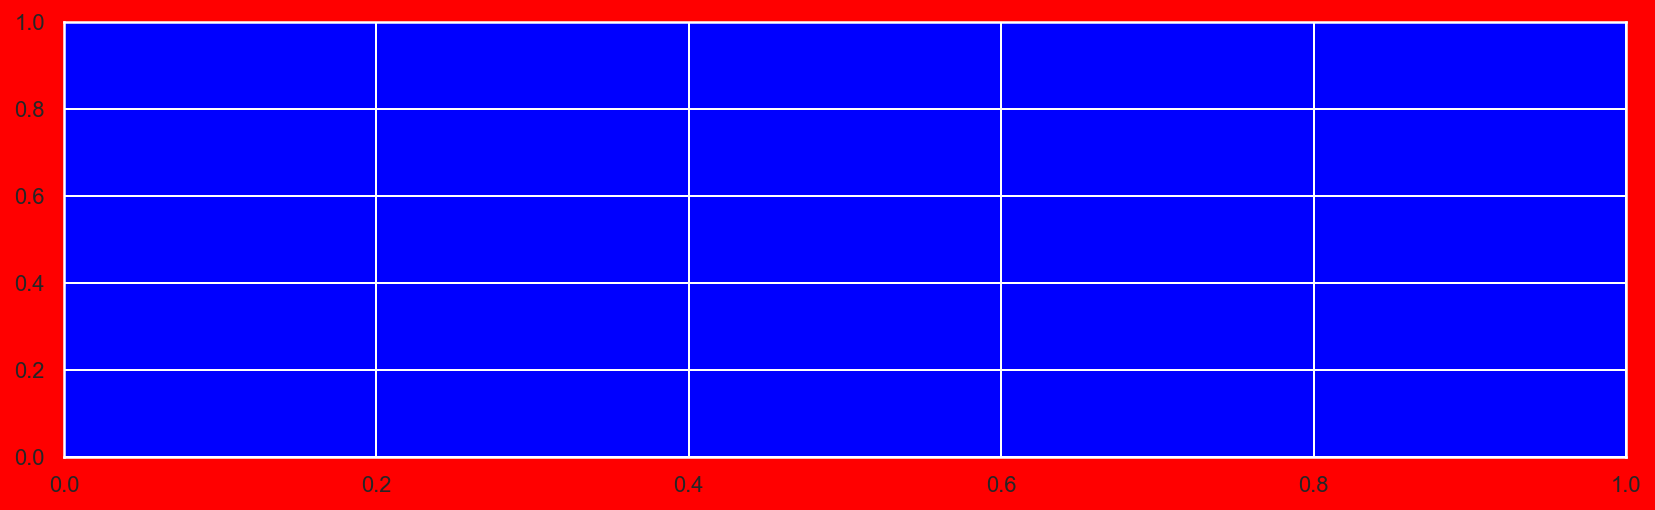

In [32]:
fig.set_facecolor('red')
ax.set_facecolor('blue')
fig

In [33]:
ax.get_children()

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

Spines are the four border line of each axes (plot).

In [34]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x13b6cd4d0>),
             ('right', <matplotlib.spines.Spine at 0x13b6cd6d0>),
             ('bottom', <matplotlib.spines.Spine at 0x13b6cd790>),
             ('top', <matplotlib.spines.Spine at 0x13b6cd990>)])

In [35]:
spines = ax.spines
left_spines, bottom_spines = spines['left'], spines['bottom']

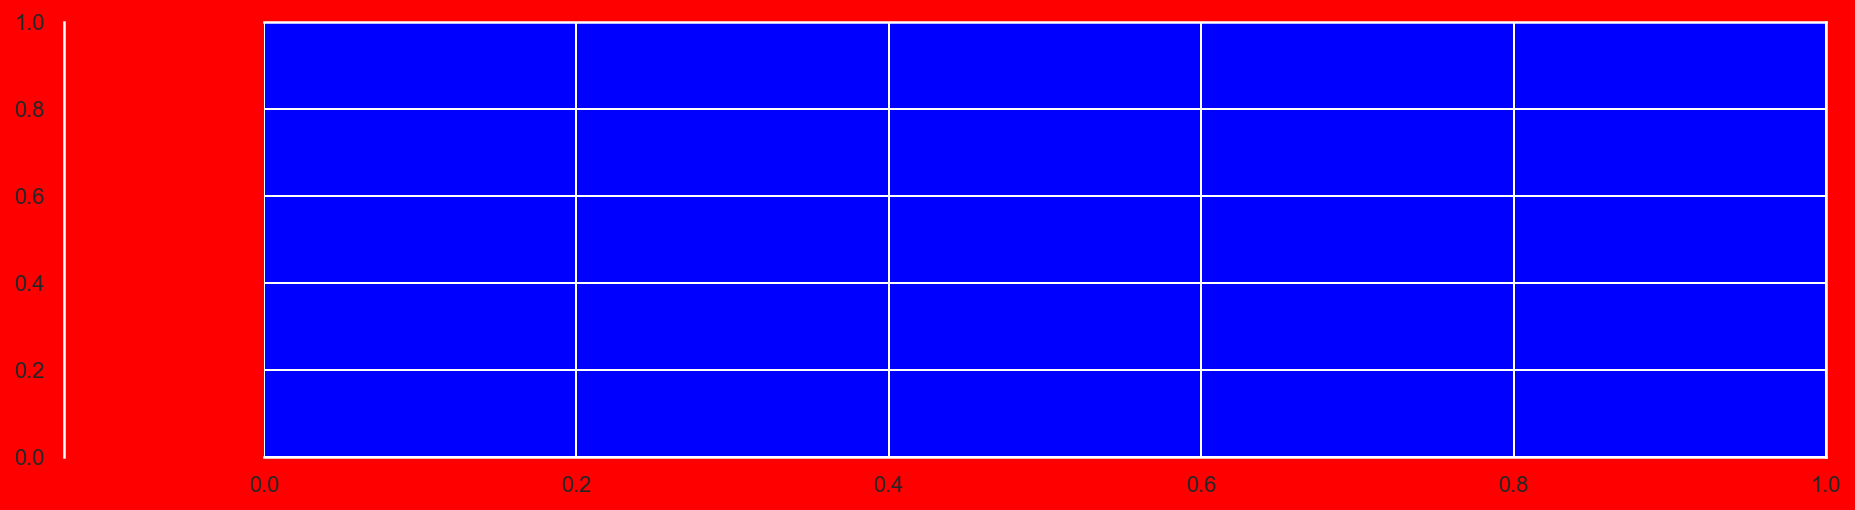

In [36]:
left_spines.set_position(('outward', 100))
fig

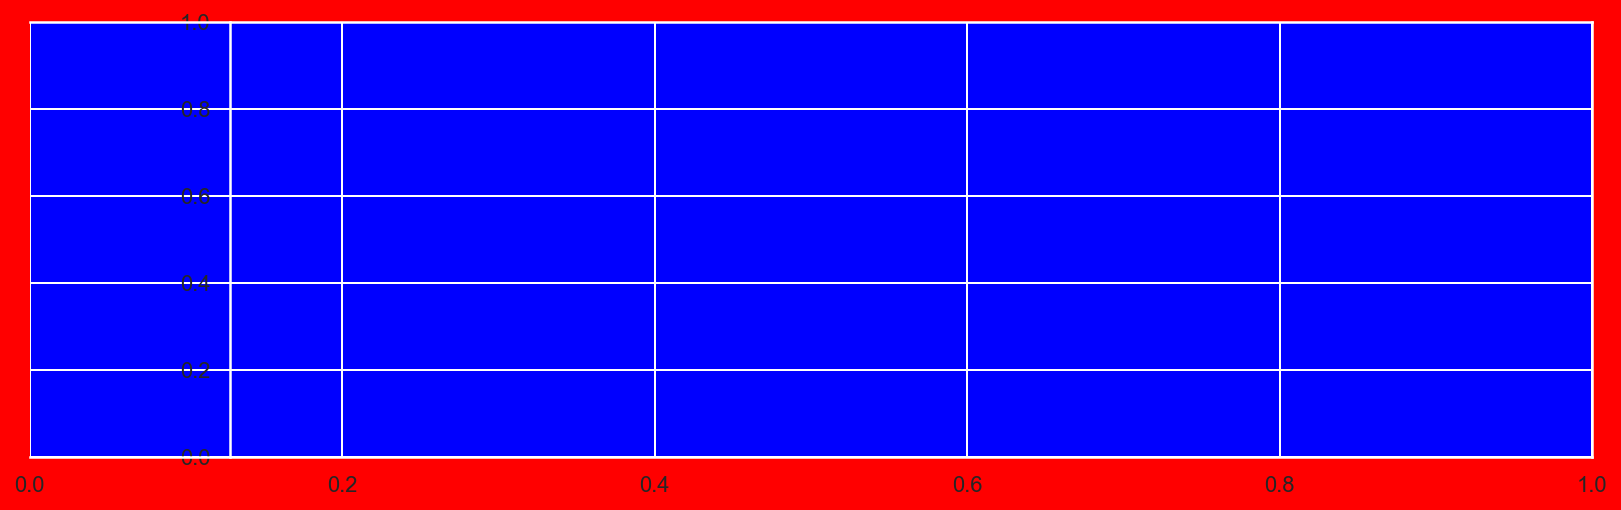

In [37]:
left_spines.set_position(('outward', -100))
fig

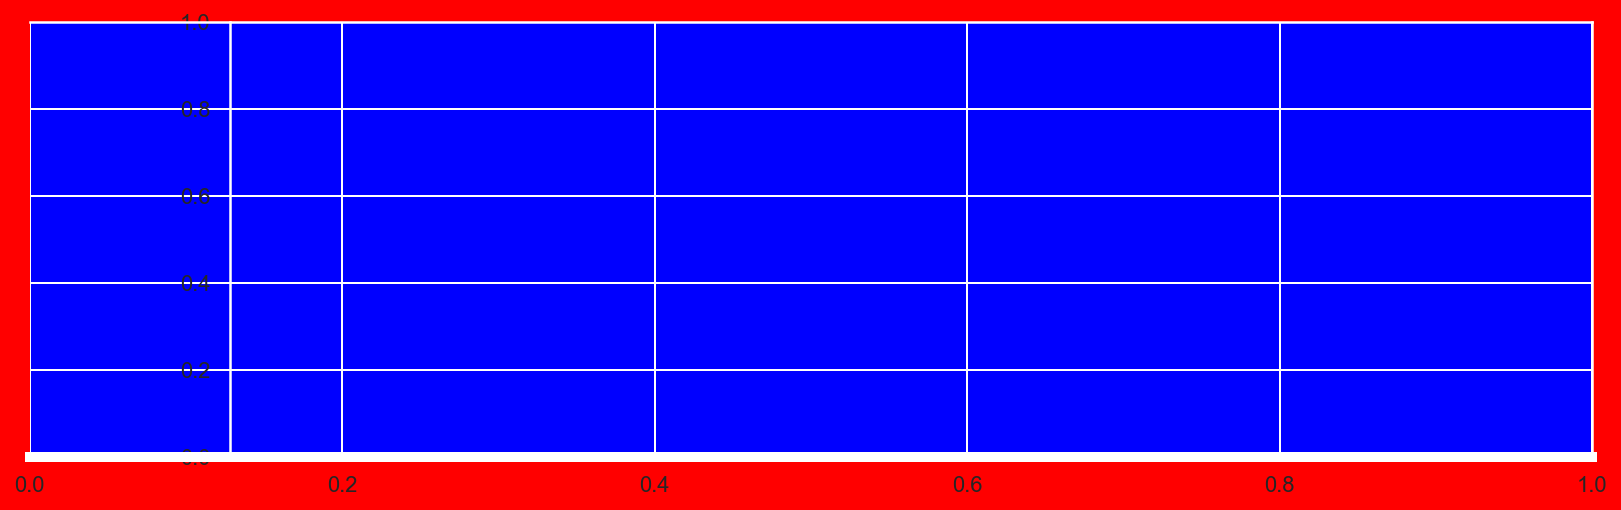

In [38]:
bottom_spines.set_linewidth(5)
fig

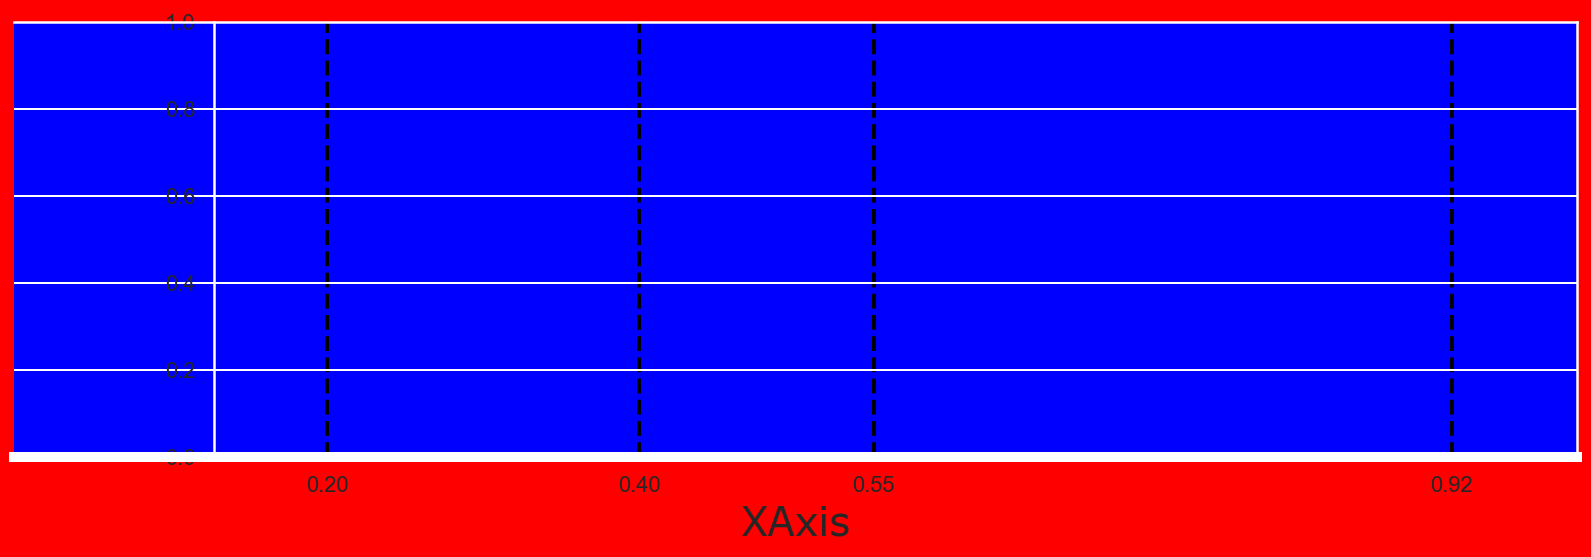

In [39]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .92])
ax.xaxis.set_label_text('XAxis', family='Verdana', fontsize=20)
fig

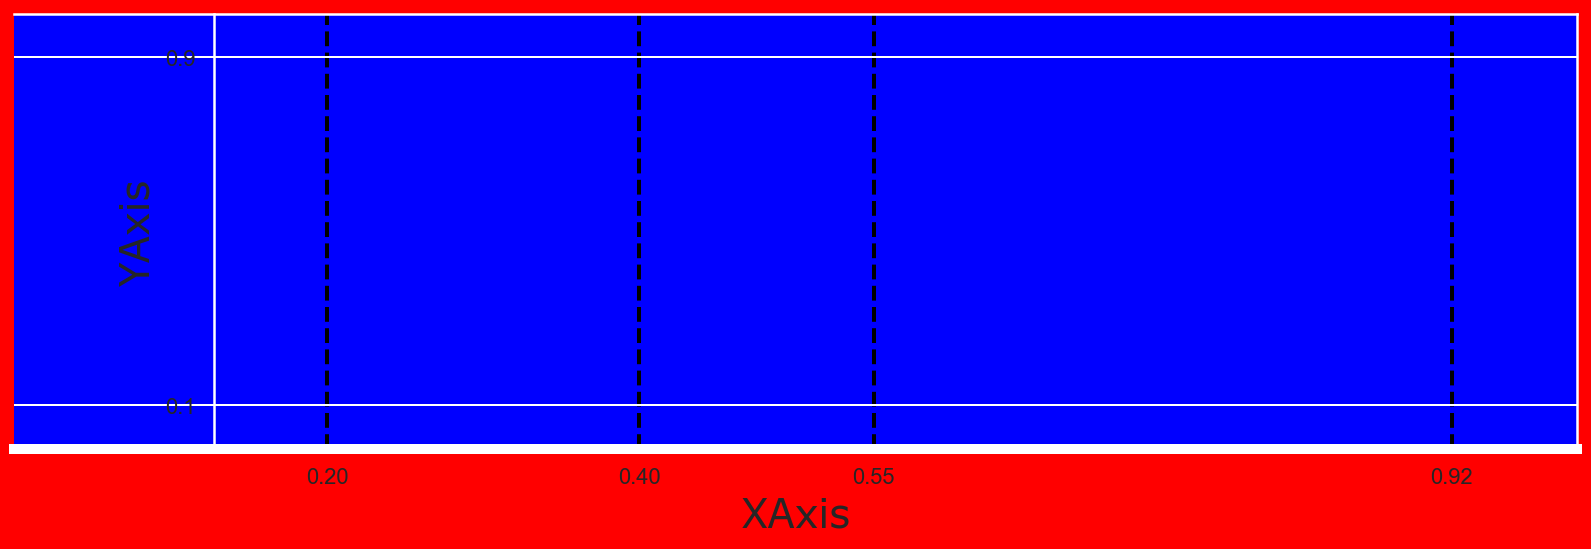

In [40]:
ax.set_yticks([.1, .9])
ax.set_ylabel('YAxis', family='Verdana', fontsize=20)
fig

In [41]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 53.400000000000006, 'XAxis'),
  Text(1, 55.400000000000006, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x13b6fae10>,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 1008x288 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 4 Line2D gridline objects>,
 'in_layout': True,
 'inverted': False,
 'label': Text(0.5, 53.400000000000006, 'XAxis'),
 'label_position': 'bottom',
 'label_text': 'XAxis',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x127b45b10>,
 'major_locator': <matplotlib.ticker.FixedLocator at 0x13b7027d0>,
 'major_ticks': [<matplotlib.axis.XTick at 0x13b6e4ed0>,
 'majorticklabels': <a list of 4 Text major ticklabel objects>,
 'majorticklines': <a list of 8 Line2D ticklines objects>,
 'majorticklocs': array([0.2 , 0.4 , 0.55, 0.92]),
 'minor_formatter': <matplotlib.ticker.NullFormatter at 0x12eb

In [42]:
flights = pd.read_csv('../pandas_cookbook/data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [43]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype('int')
flights['ON_TIME'] = 1 - flights[['DELAYED', 'CANCELLED', 'DIVERTED']].any(axis=1)
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED,DELAYED,ON_TIME
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0,1,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0,0,1
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0,1,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0,0,1
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0,1,0


In [44]:
status = flights[['DELAYED', 'CANCELLED', 'DIVERTED', 'ON_TIME']].sum()
status

DELAYED      11685
CANCELLED      881
DIVERTED       137
ON_TIME      45789
dtype: int64

''

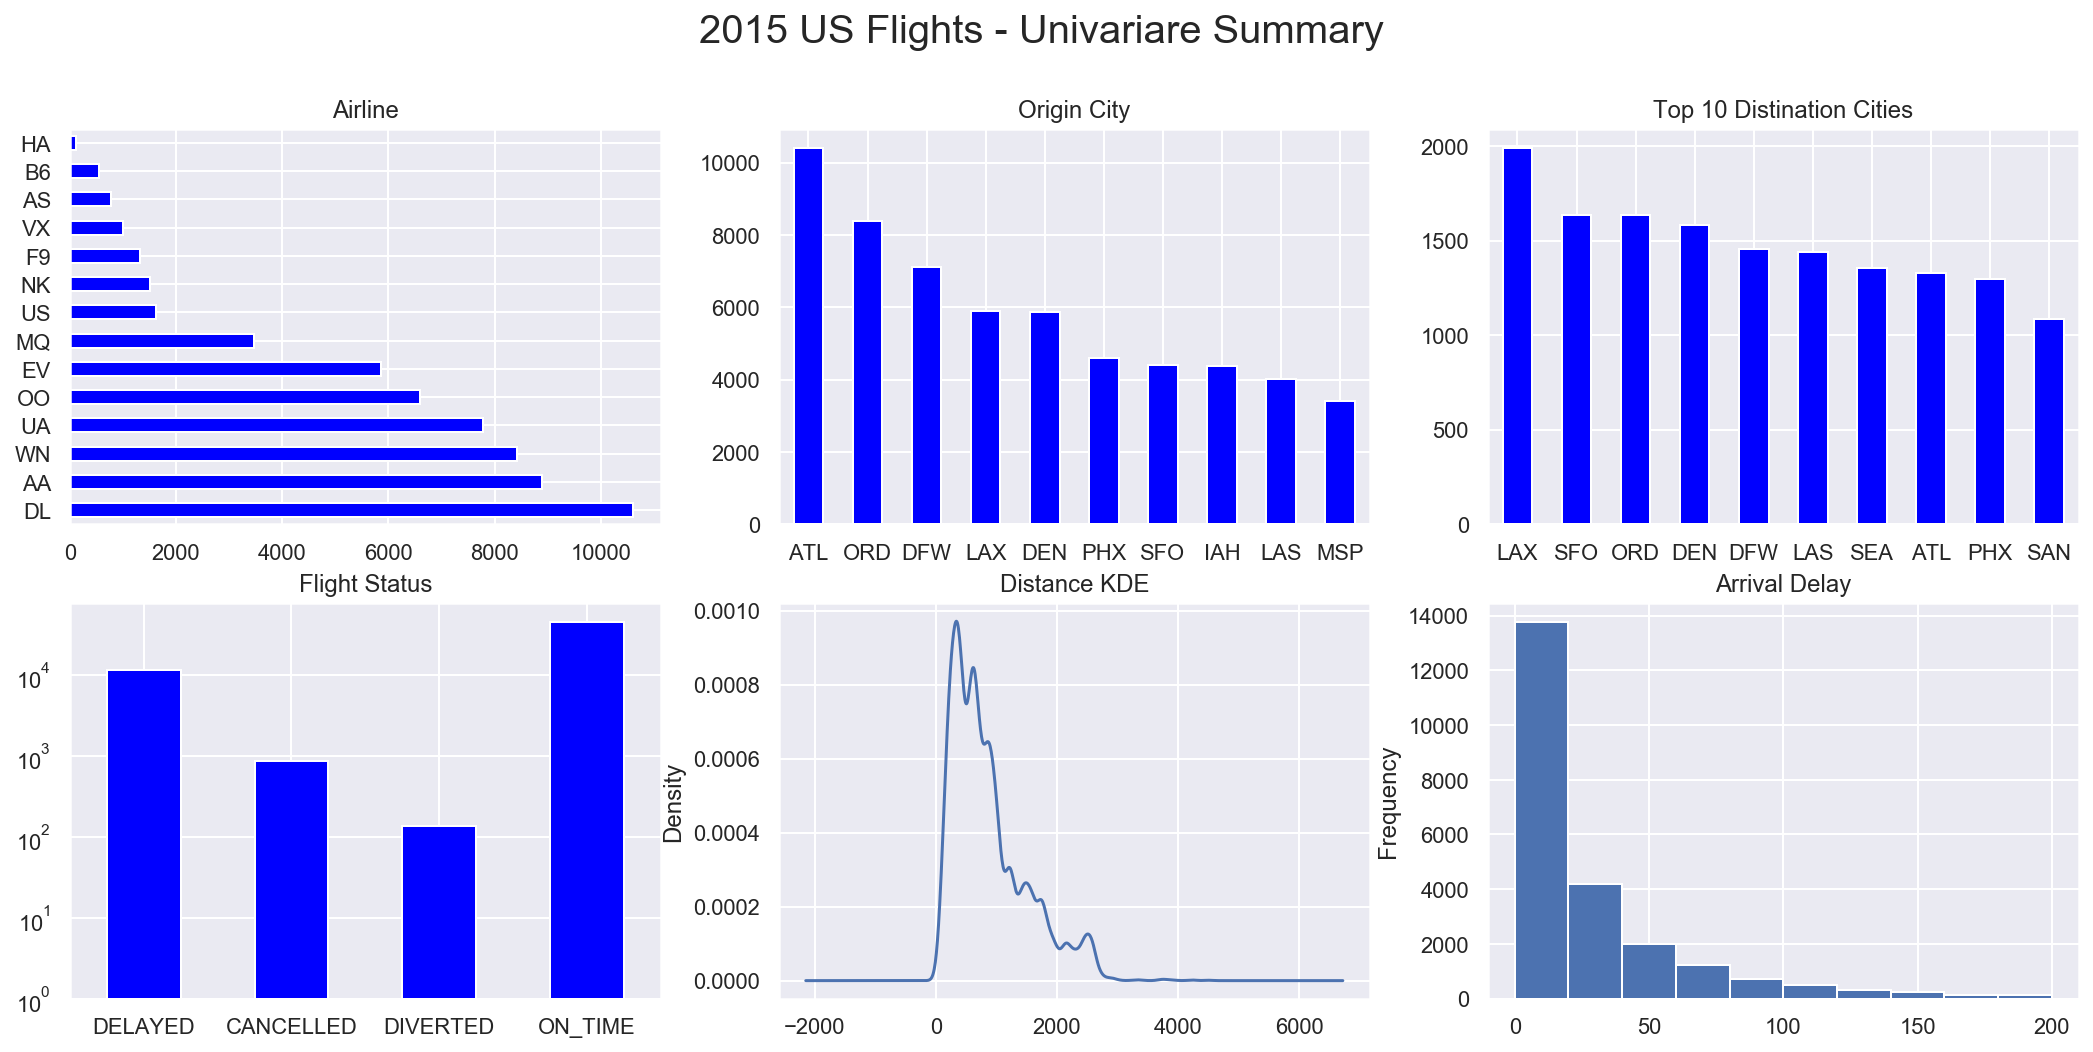

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
fig.suptitle('2015 US Flights - Univariare Summary', size=20)
(ax1, ax2, ax3), (ax4, ax5, ax6) = axes
flights.AIRLINE.value_counts().plot(kind='barh', ax=ax1, title='Airline', color='blue')
flights.ORG_AIR.value_counts().plot(kind='bar', ax=ax2, rot=0, title='Origin City', color='blue')
flights['DEST_AIR'].value_counts().head(10).plot(kind='bar', ax=ax3,
                                                 title='Top 10 Distination Cities',
                                                 rot=0, color='blue')
status.plot(kind='bar', ax=ax4, log=True, rot=0, color='blue', title='Flight Status')
flights.DIST.plot(kind='kde', ax=ax5, title='Distance KDE')
flights['ARR_DELAY'].plot(kind='hist', ax=ax6, range=(0, 200), title='Arrival Delay')
;

In [46]:
employees = pd.read_csv('../pandas_cookbook/data/employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])
employees.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


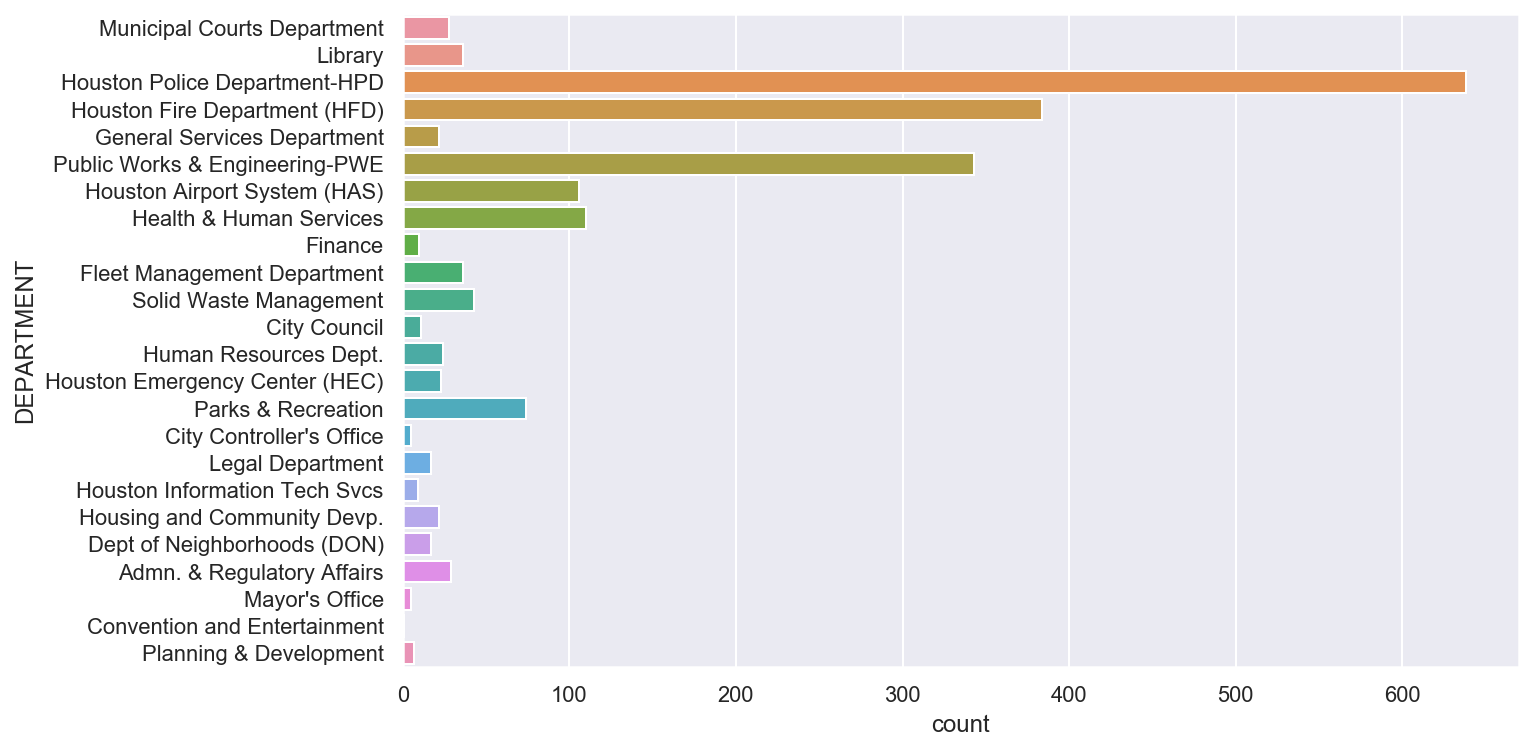

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='DEPARTMENT', data=employees, ax=ax);

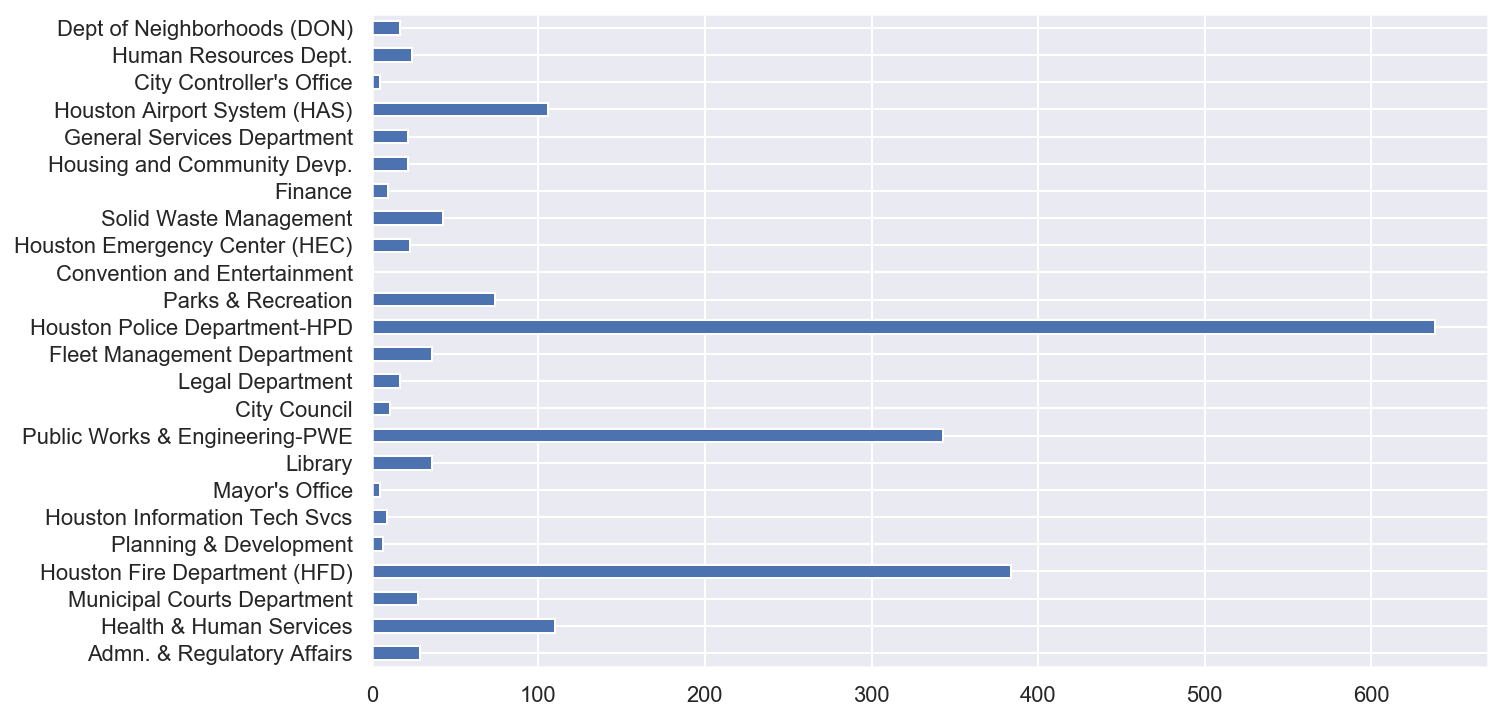

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
employees.DEPARTMENT.value_counts(sort=False).plot(ax=ax, kind='barh');

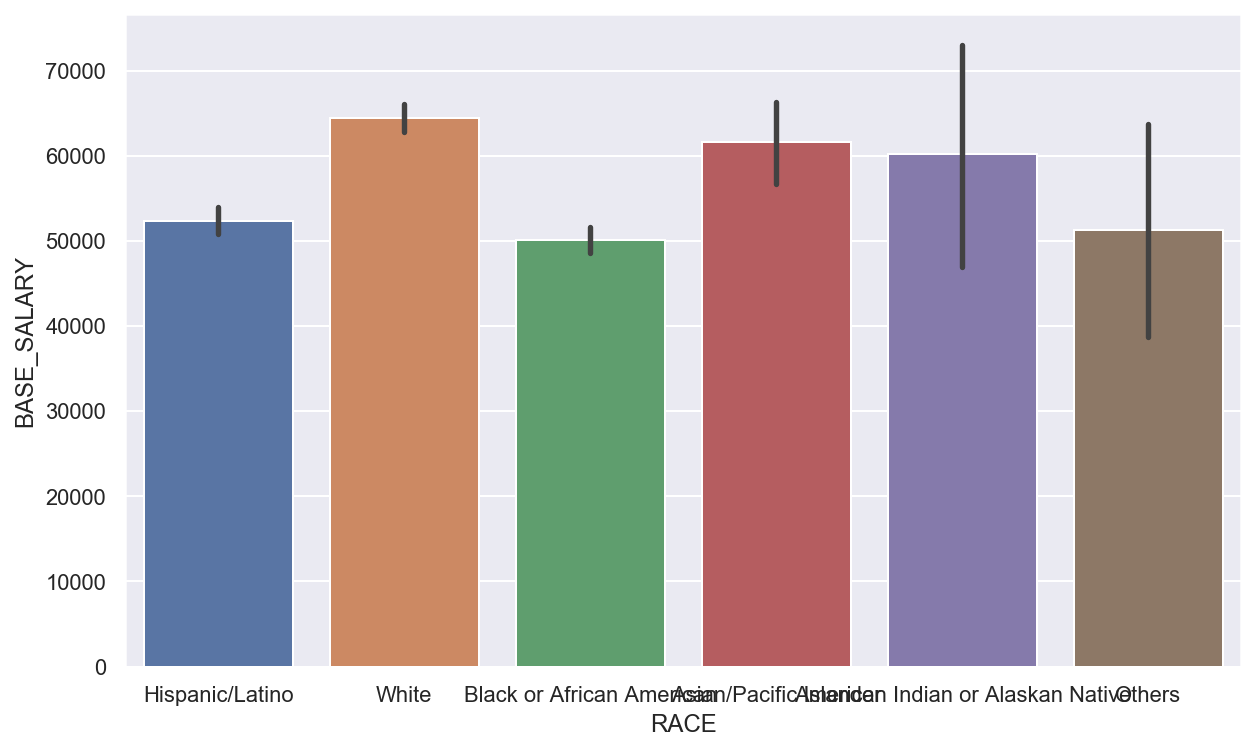

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='RACE', y='BASE_SALARY', data=employees, ax=ax);

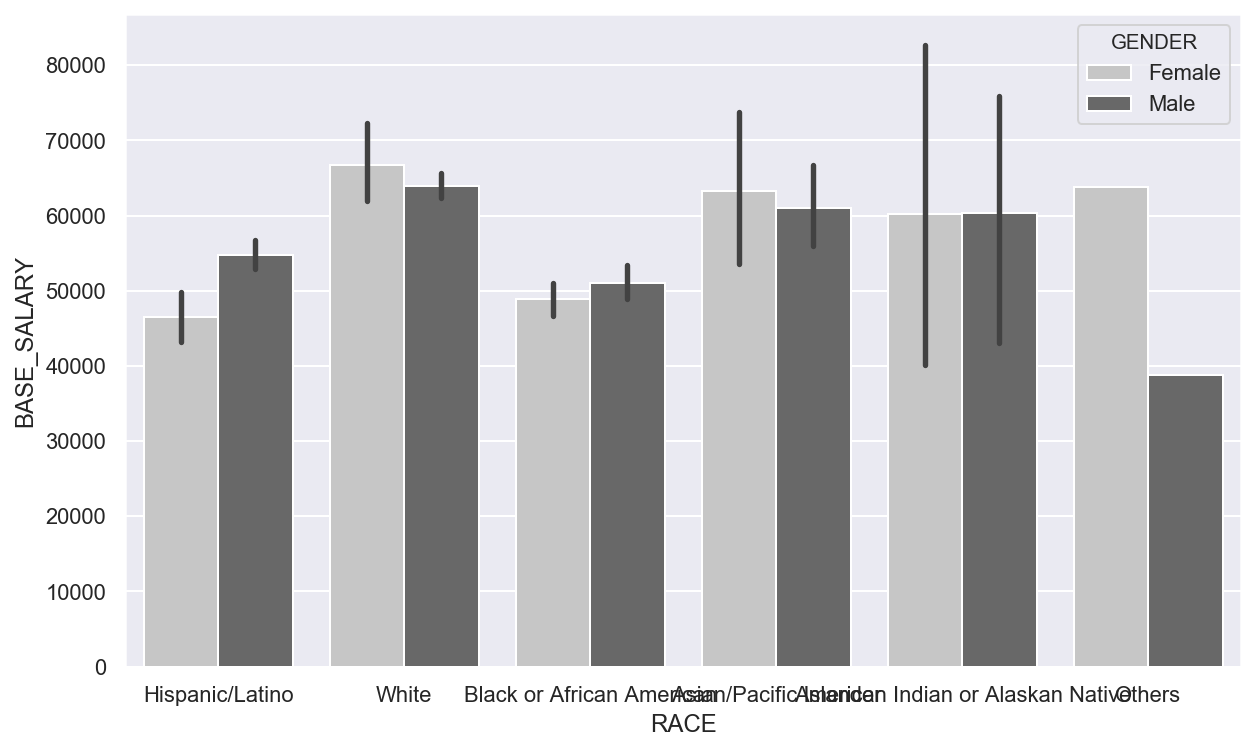

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='RACE', y='BASE_SALARY', data=employees, ax=ax, hue='GENDER', palette='Greys');

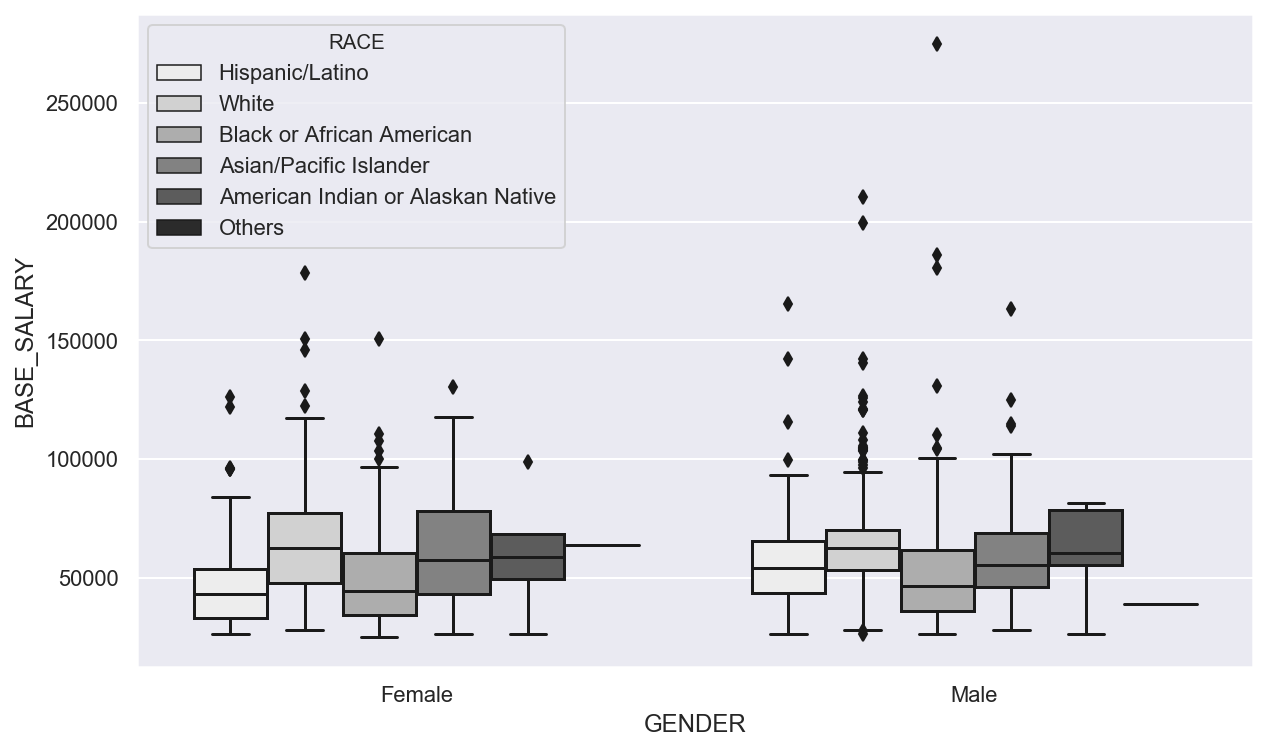

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='GENDER', y='BASE_SALARY', data=employees, ax=ax, hue='RACE', palette='Greys');

In [52]:
pd.Timedelta(1, unit='Y')

/Users/imad/anaconda3/envs/ds-zoo/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


Timedelta('365 days 05:49:12')

In [53]:
days_hired = pd.to_datetime('12-20-2018') - employees['HIRE_DATE']
employees['YEARS_EXPERIENCE'] = days_hired / pd.Timedelta(1, unit='Y')
employees.head()

/Users/imad/anaconda3/envs/ds-zoo/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  


,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,12.523187
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,18.420638
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,3.876876
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,36.863180
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,29.503686


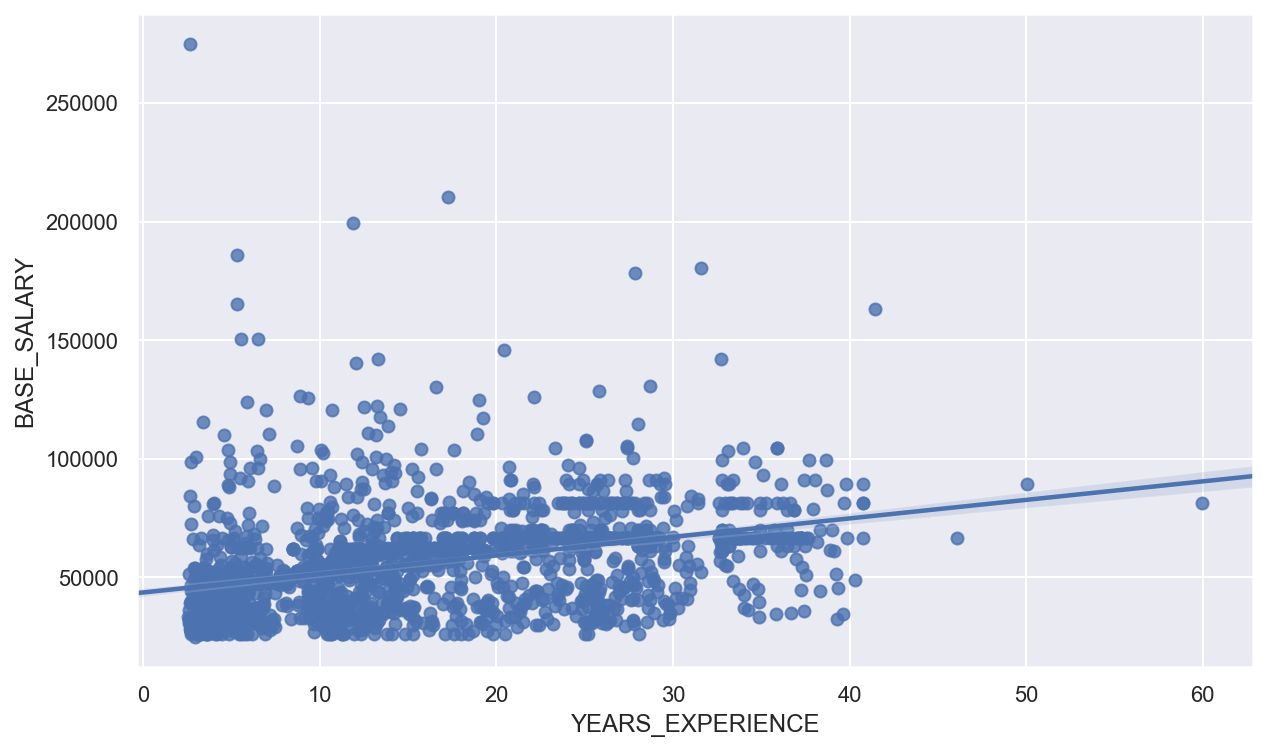

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', data=employees, ax=ax);

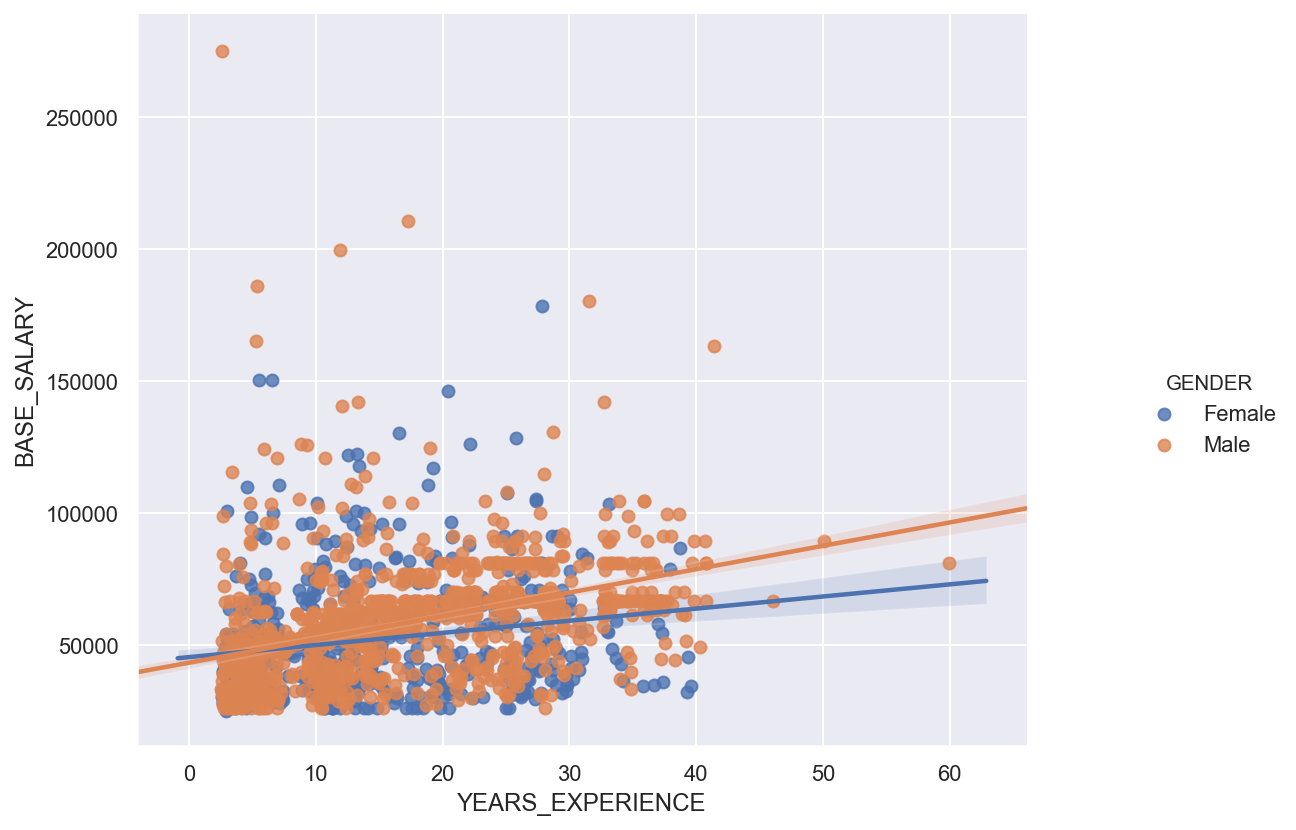

In [55]:
g = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', hue='GENDER', data=employees)
g.fig.set_size_inches(10, 6);

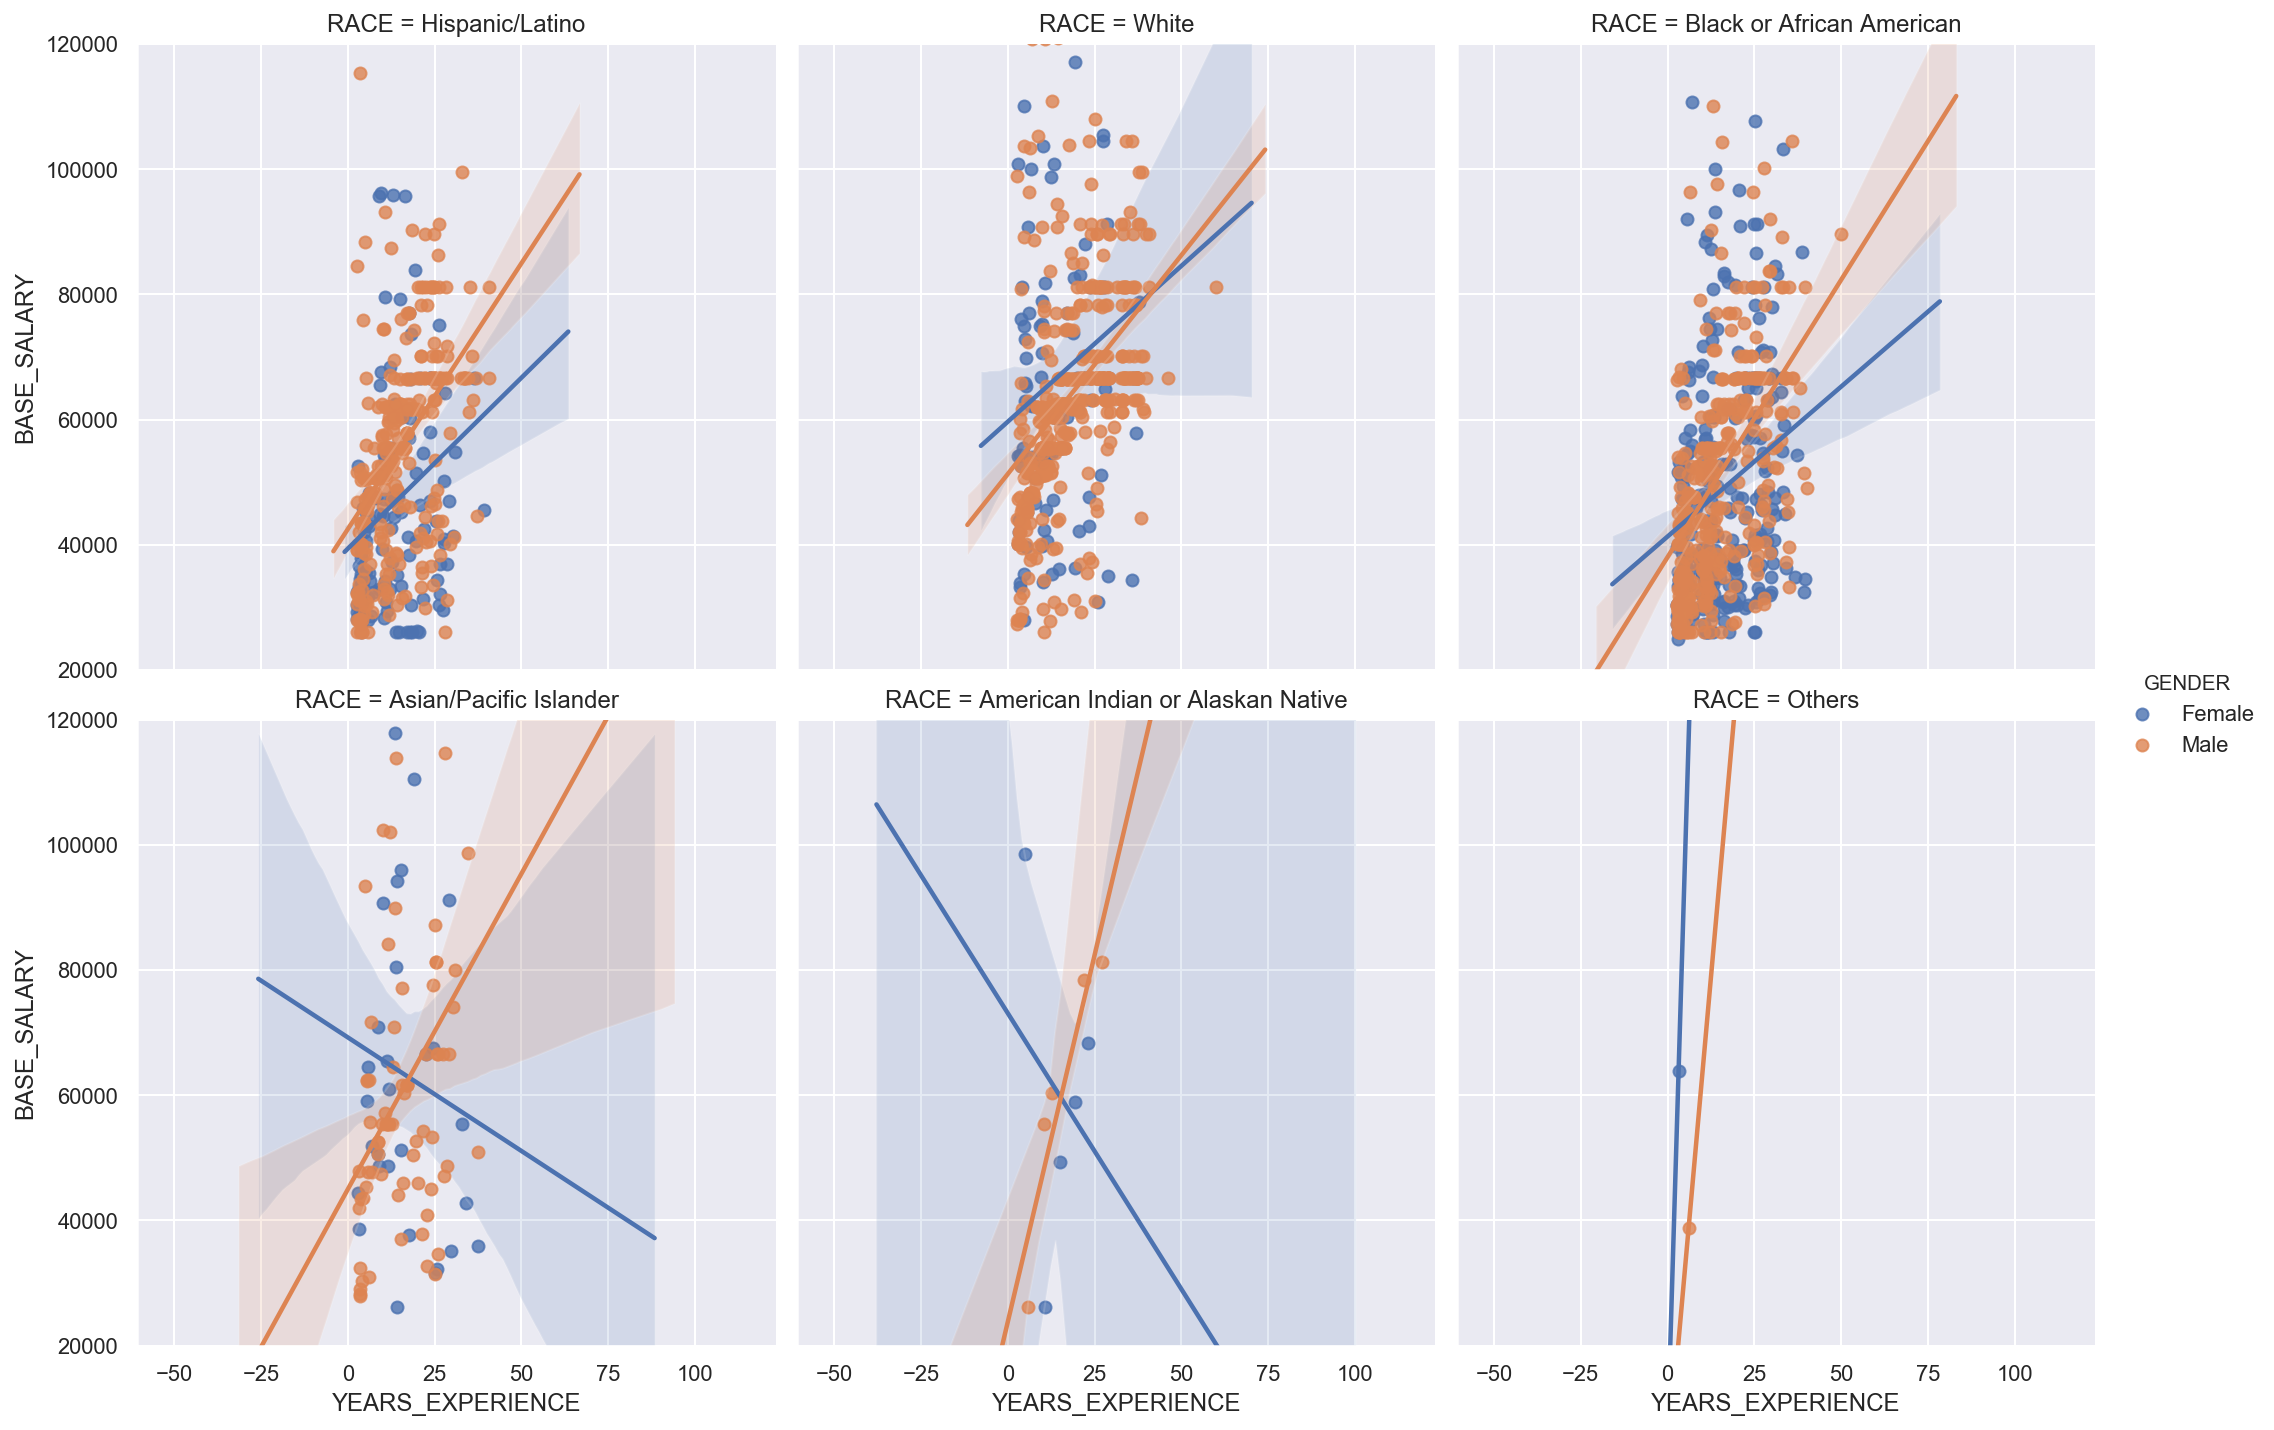

In [56]:
g = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
               hue='GENDER', col='RACE', col_wrap=3,
               data=employees)
g.set(ylim=(20000, 120000))

In [57]:
deps = employees['DEPARTMENT'].value_counts().index[:2]
races = employees['RACE'].value_counts().index[:3]
is_dep = employees['DEPARTMENT'].isin(deps)
is_race = employees['RACE'].isin(races)
emp2 = employees[is_dep & is_race].copy()

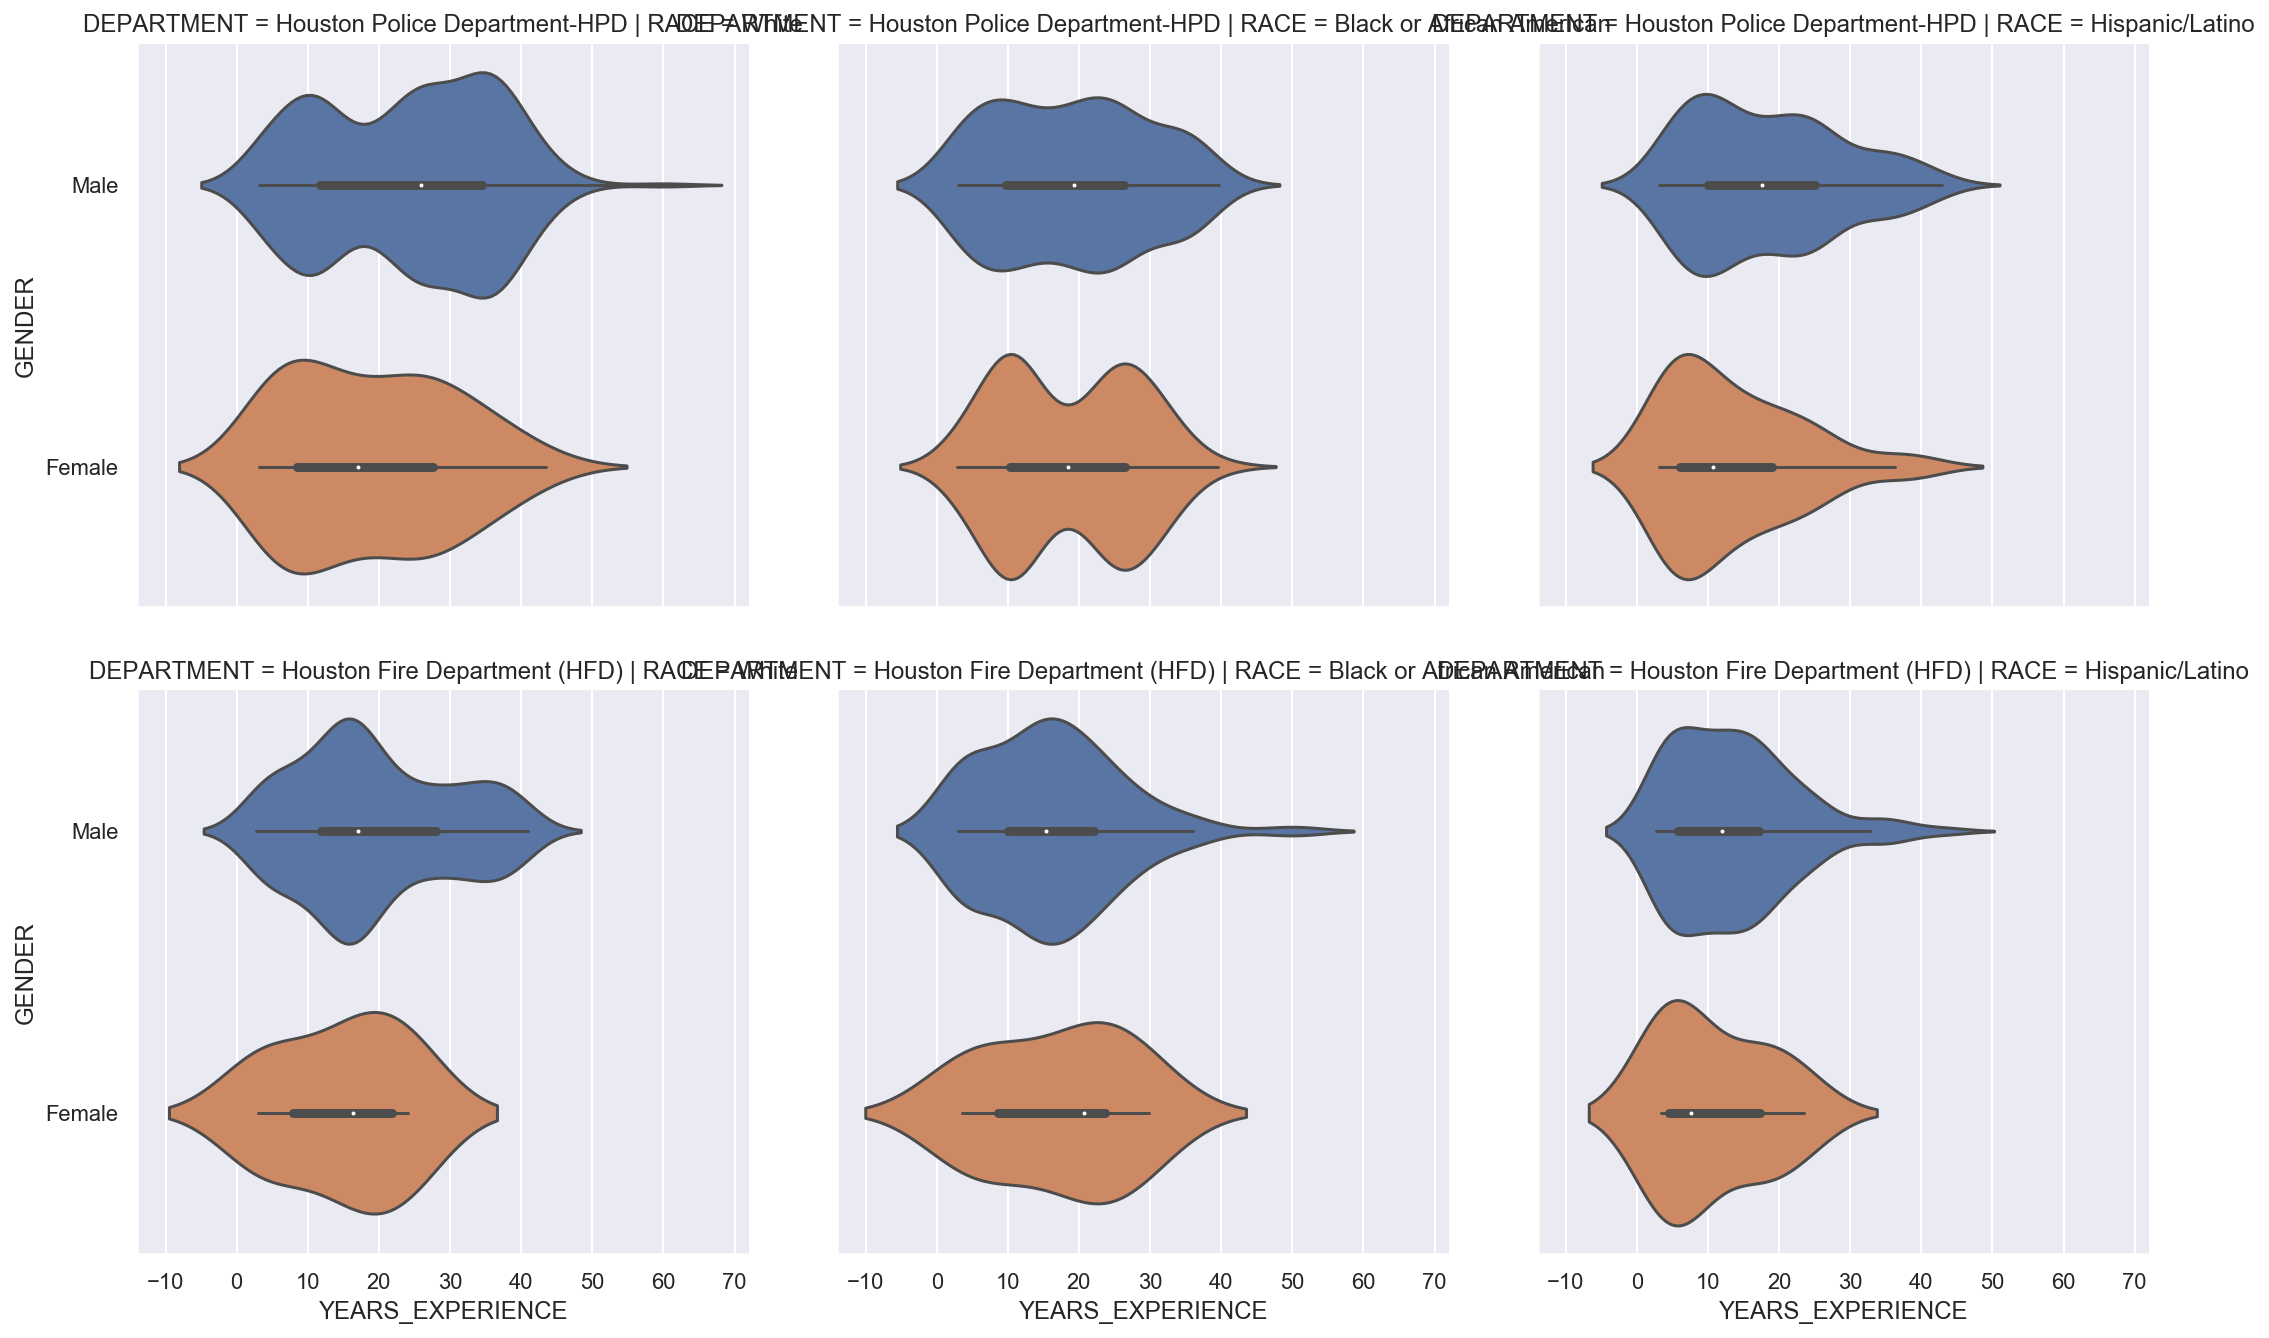

In [58]:
g = sns.catplot(x='YEARS_EXPERIENCE', y='GENDER',
               col='RACE', kind='violin', row='DEPARTMENT',
               height=3, aspect=2, data=emp2)
g.fig.set_size_inches(15, 10)

In [60]:
diamonds = pd.read_csv('../pandas_cookbook/data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


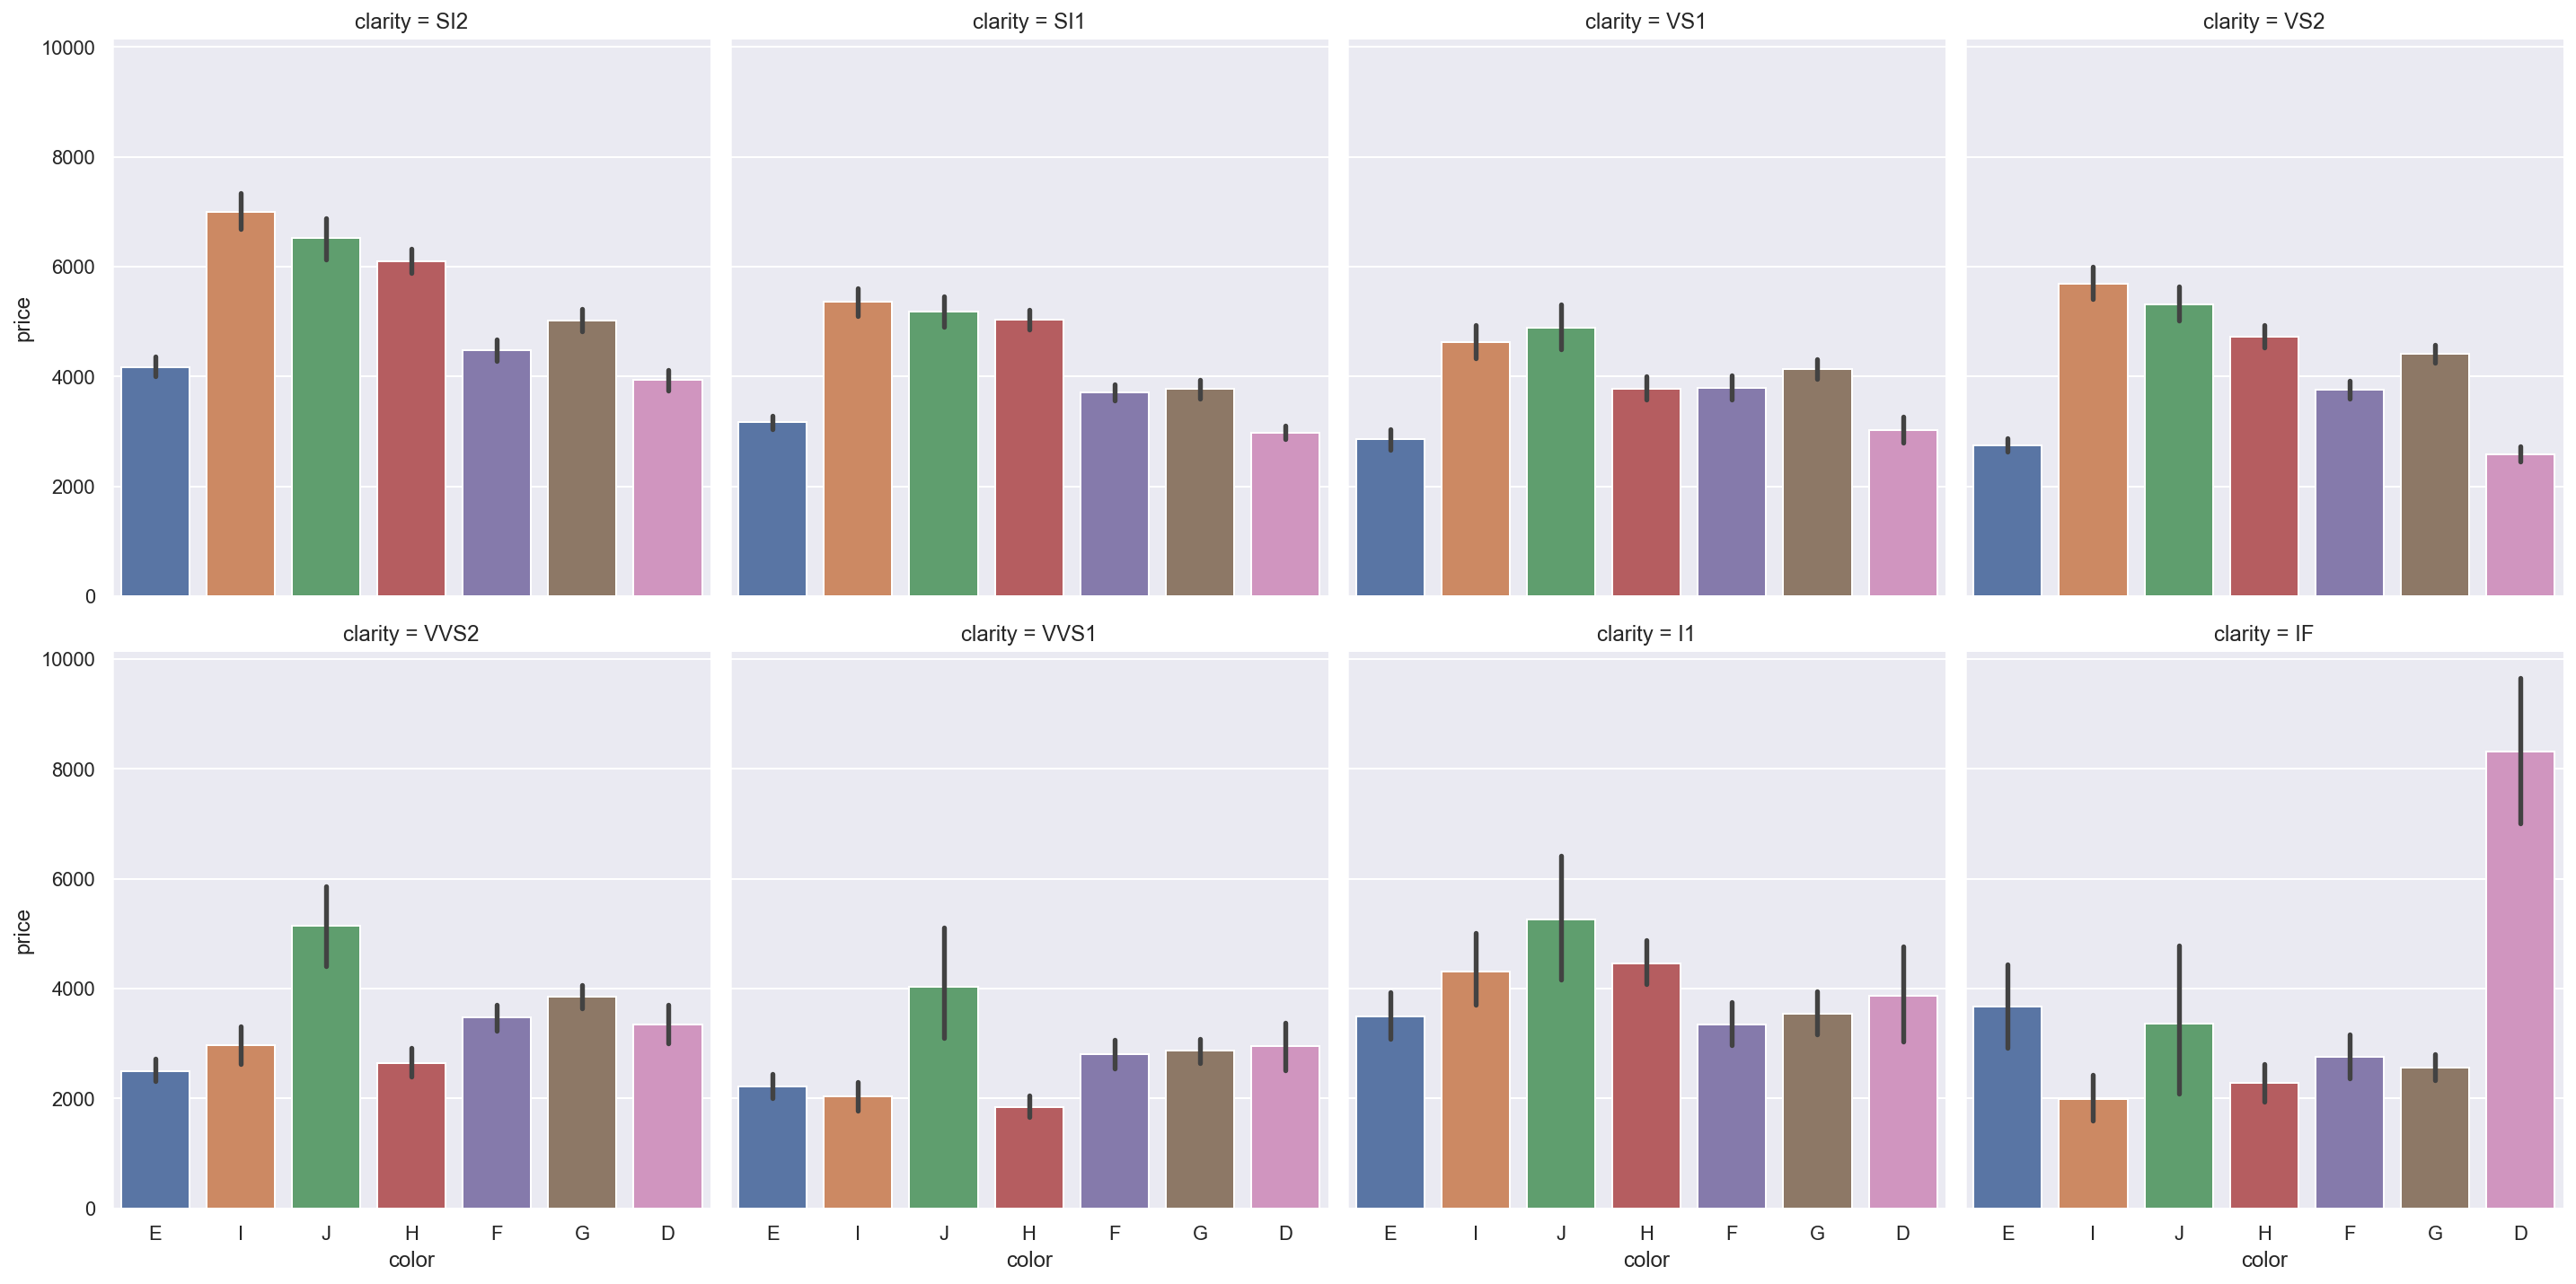

In [61]:
sns.catplot(x='color', y='price', col='clarity', kind='bar', col_wrap=4, data=diamonds)